# Social Media Sentiments Analysis

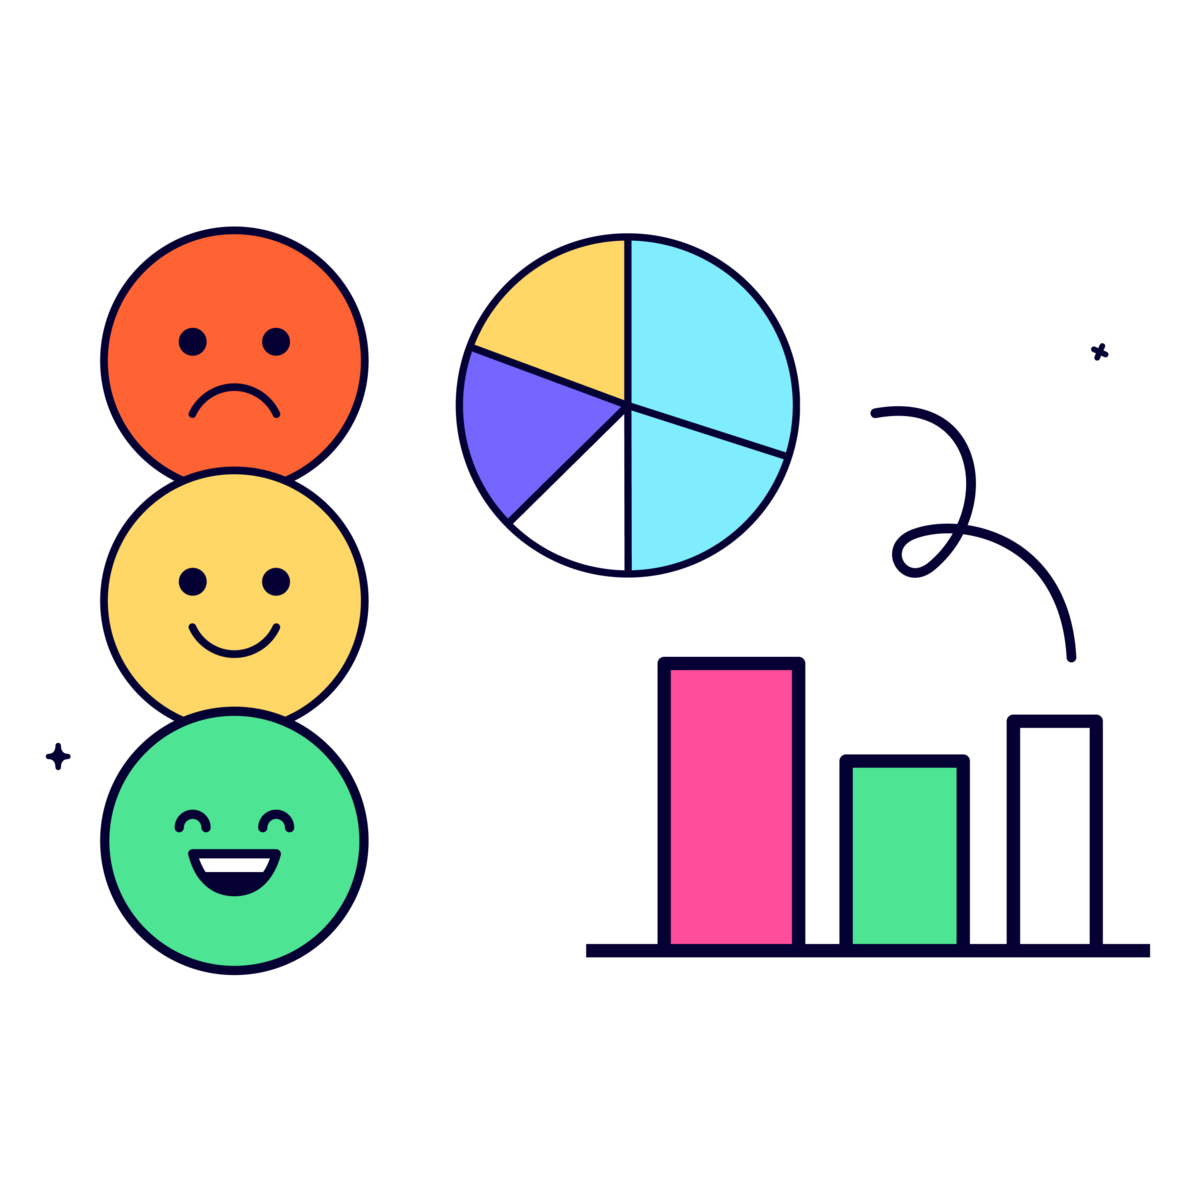

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sentiment_dataset.csv')

In [4]:
df.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

          Timestamp            User     Platform  \
0  15-01-2023 12:30   User123          Twitter     
1  15-01-2023 08:45   CommuterX        Twitter     
2  15-01-2023 15:45   FitnessFan      Instagram    
3  15-01-2023 18:20   AdventureX       Facebook    
4  15-01-2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                    15     30     USA         
1   #Traffic #Morning                                 5     10     Canada      
2   #Fitness #Workout                                20     40   USA           
3   #Travel #Adventure                                8     15     UK          
4   #Cooking #Food                                   12     25    Australia    

   Year  Month  Day  Hour  
0  2023      1   15    12  
1  2023      1   15     8  
2  2023      1   15    15  
3  2023      1   15    18  
4  2023      1   15    19

In [5]:
df.tail()

Unnamed: 0.1  Unnamed: 0  \
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text Sentiment  \
727  Collaborating on a science project that receiv...    Happy    
728  Attending a surprise birthday party organized ...    Happy    
729  Successfully fundraising for a school charity ...    Happy    
730  Participating in a multicultural festival, cel...    Happy    
731  Organizing a virtual talent show during challe...    Happy    

            Timestamp                                   User     Platform  \
727  18-08-2017 18:20       ScienceProjectSuccessHighSchool     Facebook    
728  22-06-2018 14:15            BirthdayPartyJoyHighSchool    Instagram    
729  05-04-2019 17:30   CharityFundraisingTriumphHighSchool      Twitter    
730  29-02-2020 20:45    MulticulturalFestivalJoyHighSchool     Facebook    
731  15-11-2020 15:15    VirtualTalentShowSuccessHighSchool    Instagram    

                                          Hashtags  Retweets  Likes  Country  \
727         #ScienceFairWinner #HighSchoolScience         20     39       UK   
728    #SurpriseCelebration #HighSchoolFriendship         25     48      USA   
729      #CommunityGiving #HighSchoolPhilanthropy         22     42   Canada   
730         #CulturalCelebration #HighSchoolUnity         21     43       UK   
731   #VirtualEntertainment #HighSchoolPositivity         24     47      USA   

     Year  Month  Day  Hour  
727  2017      8   18    18  
728  2018      6   22    14  
729  2019      4    5    17  
730  2020      2   29    20  
731  2020     11   15    15

In [6]:
df.shape

(732, 15)

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [10]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

In [11]:
df.duplicated().sum()

22

In [12]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 710 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       710 non-null    object        
 1   Sentiment  710 non-null    object        
 2   Timestamp  710 non-null    datetime64[ns]
 3   User       710 non-null    object        
 4   Platform   710 non-null    object        
 5   Hashtags   710 non-null    object        
 6   Retweets   710 non-null    int64         
 7   Likes      710 non-null    int64         
 8   Country    710 non-null    object        
 9   Year       710 non-null    int32         
 10  Month      710 non-null    int32         
 11  Day        710 non-null    int32         
 12  Hour       710 non-null    int64         
dtypes: datetime64[ns](1), int32(3), int64(3), object(6)
memory usage: 69.3+ KB


In [15]:
df.describe()

Timestamp    Retweets       Likes         Year  \
count                            710  710.000000  710.000000   710.000000   
mean   2020-12-11 19:41:01.690140672   21.549296   42.981690  2020.481690   
min              2010-05-15 15:30:00    5.000000   10.000000  2010.000000   
25%              2019-03-04 06:50:00   18.000000   35.000000  2019.000000   
50%              2021-10-16 16:37:30   22.000000   43.000000  2021.000000   
75%              2023-02-27 17:38:45   25.000000   50.000000  2023.000000   
max              2023-10-22 20:45:00   40.000000   80.000000  2023.000000   
std                              NaN    7.117567   14.202682     2.827246   

            Month         Day        Hour  
count  710.000000  710.000000  710.000000  
mean     6.094366   15.494366   15.600000  
min      1.000000    1.000000    0.000000  
25%      3.000000   10.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000  
max     12.000000   31.000000   23.000000  
std      3.400962    8.439236    4.064779

In [16]:
df.nunique()

Text         706
Sentiment    191
Timestamp    683
User         670
Platform       3
Hashtags     692
Retweets      26
Likes         38
Country       33
Year          14
Month         12
Day           31
Hour          22
dtype: int64

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'int32', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Text', 'Sentiment', 'User', 'Platform', 'Hashtags', 'Country'], dtype='object')

Numerical type columns:
Index(['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour'], dtype='object')


In [18]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'int32', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [19]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [20]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Platform']
Non-Categorical Features: ['Text', 'Sentiment', 'User', 'Hashtags', 'Country']
Discrete Features: []
Continuous Features: ['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']


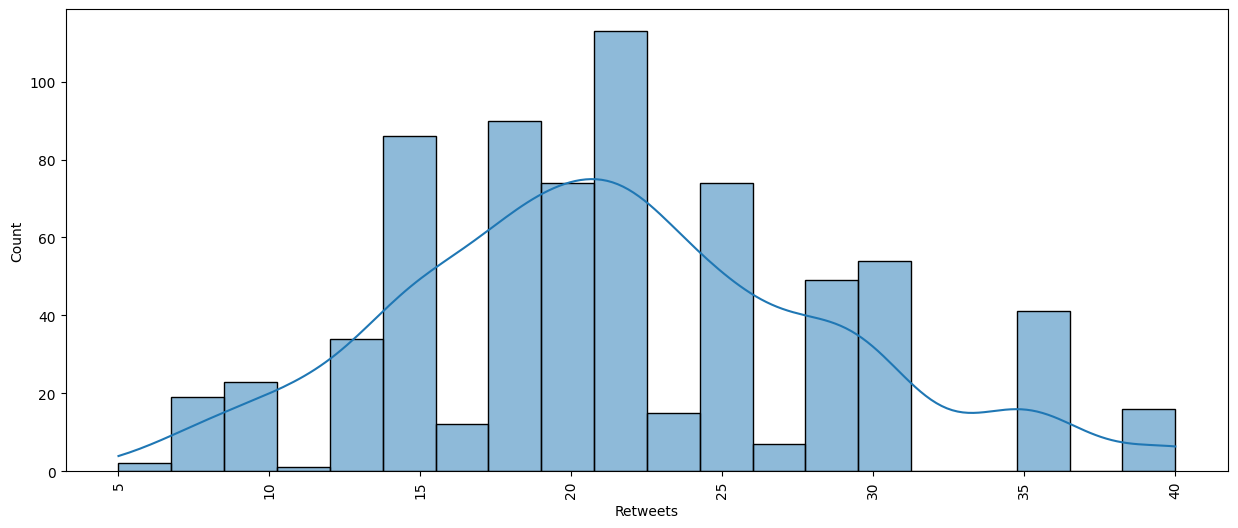

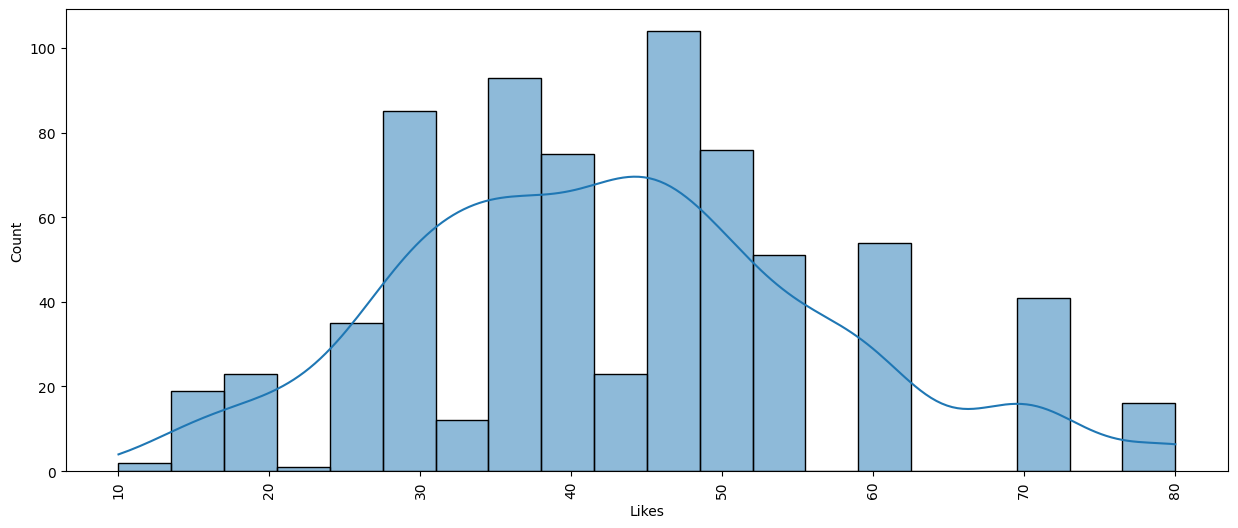

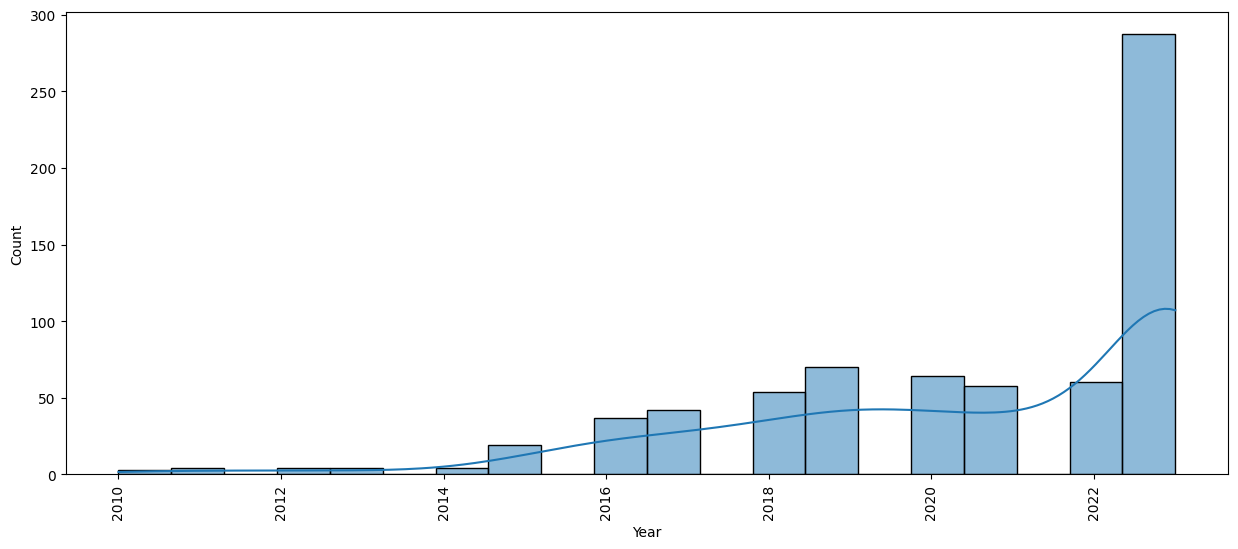

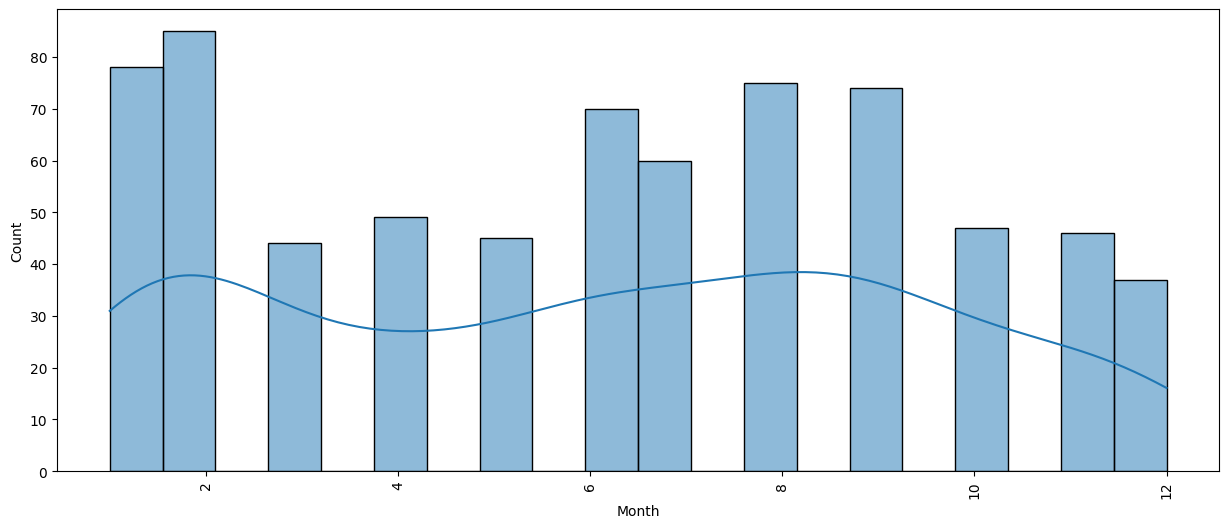

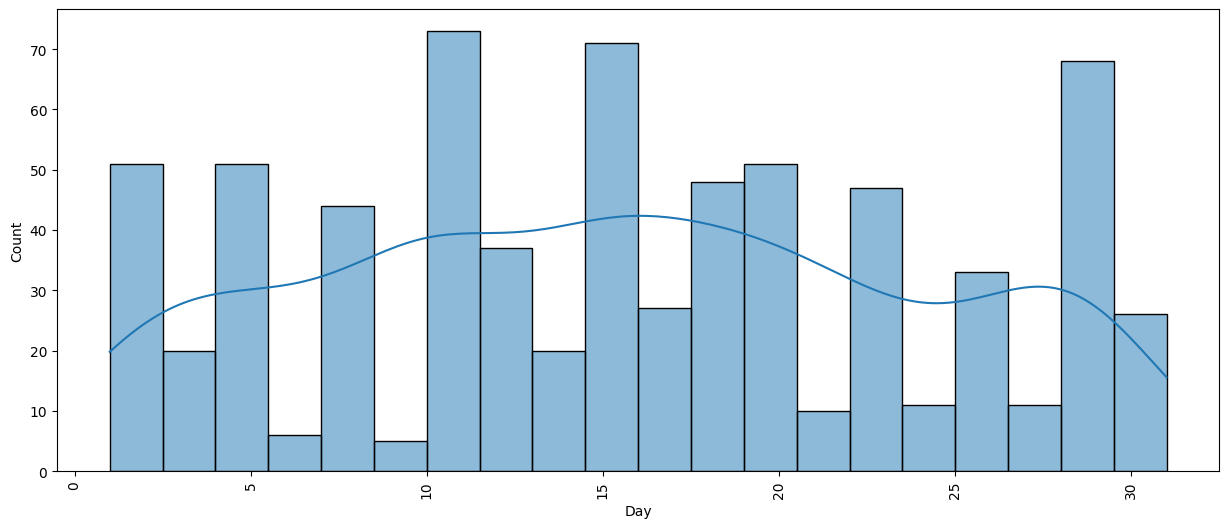

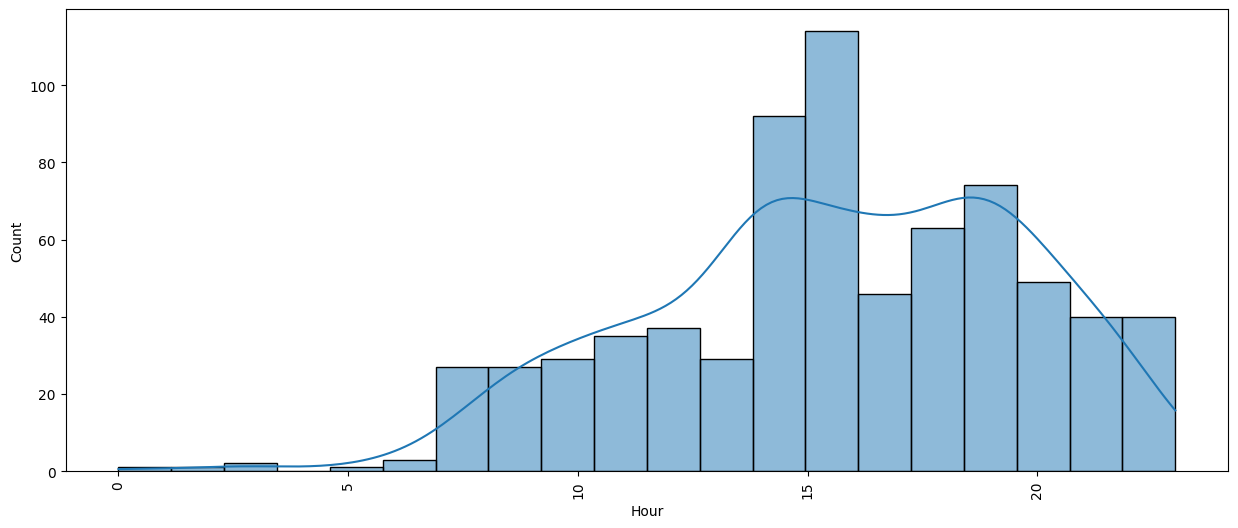

In [21]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

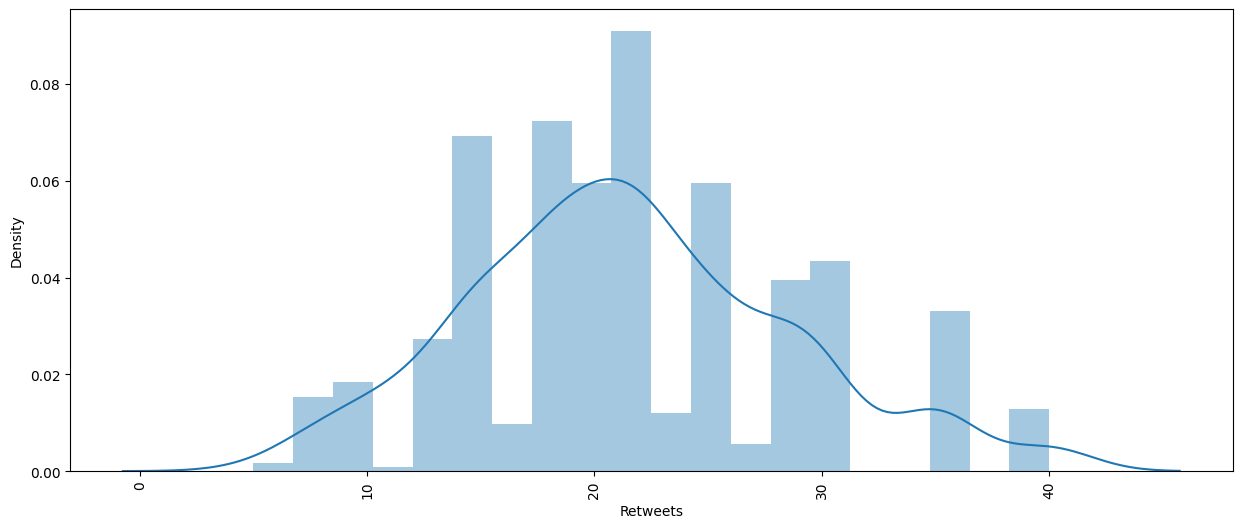

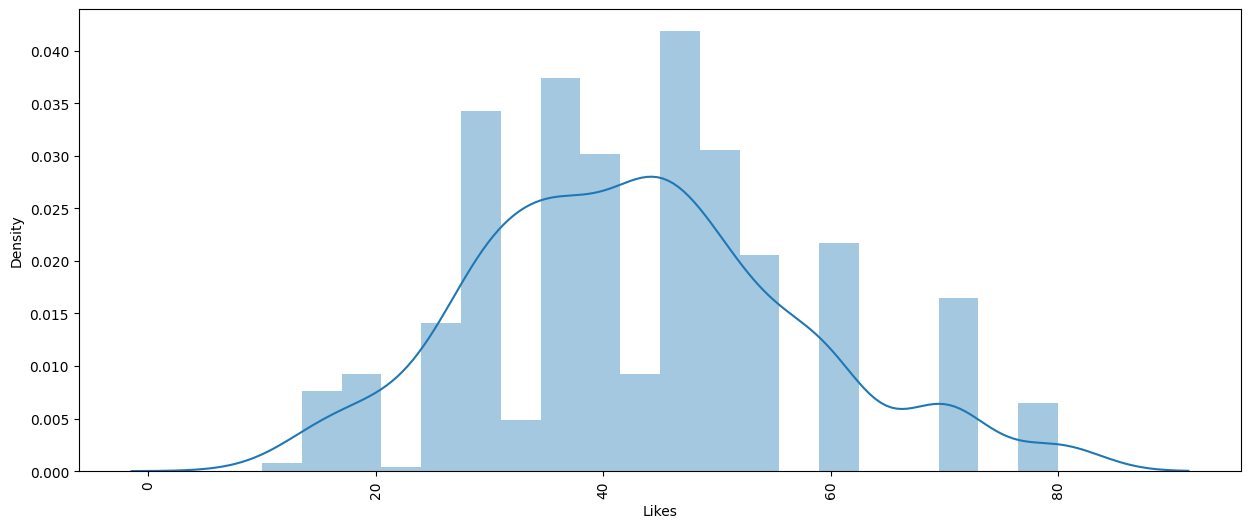

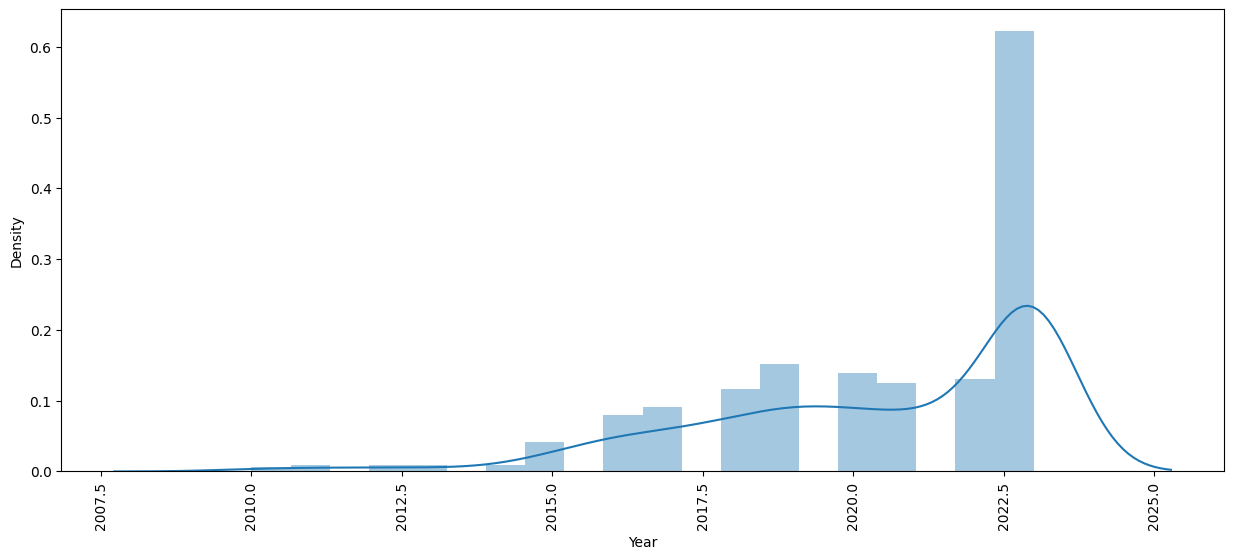

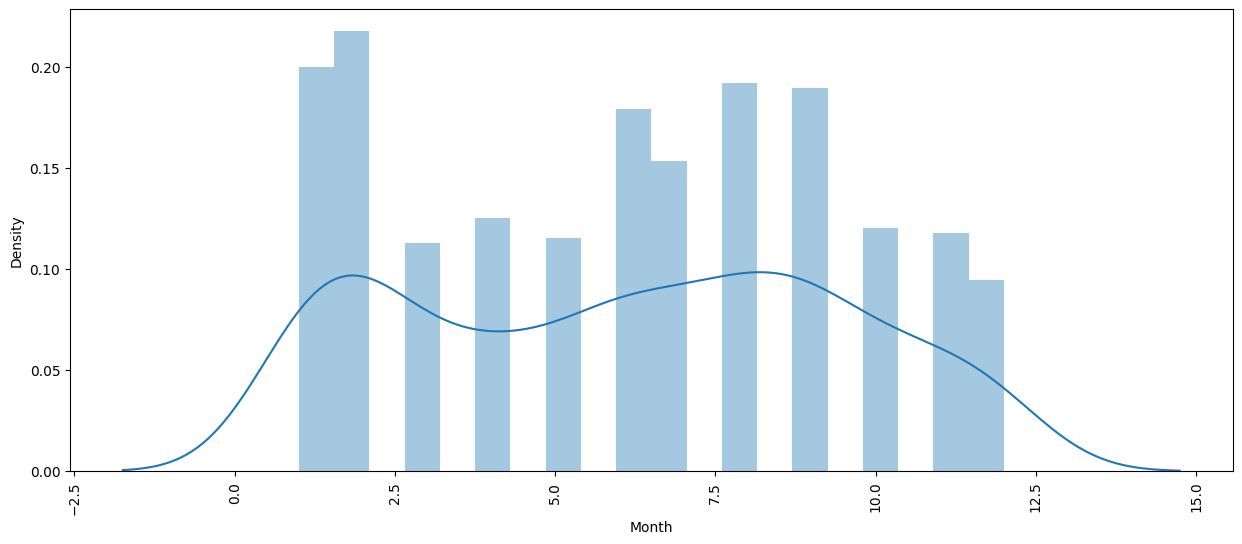

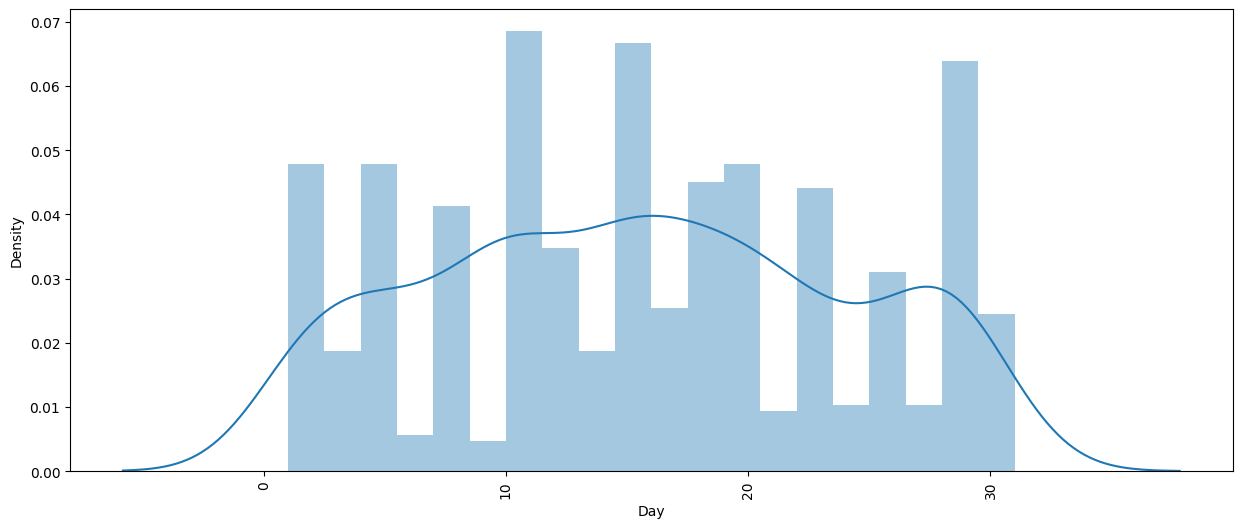

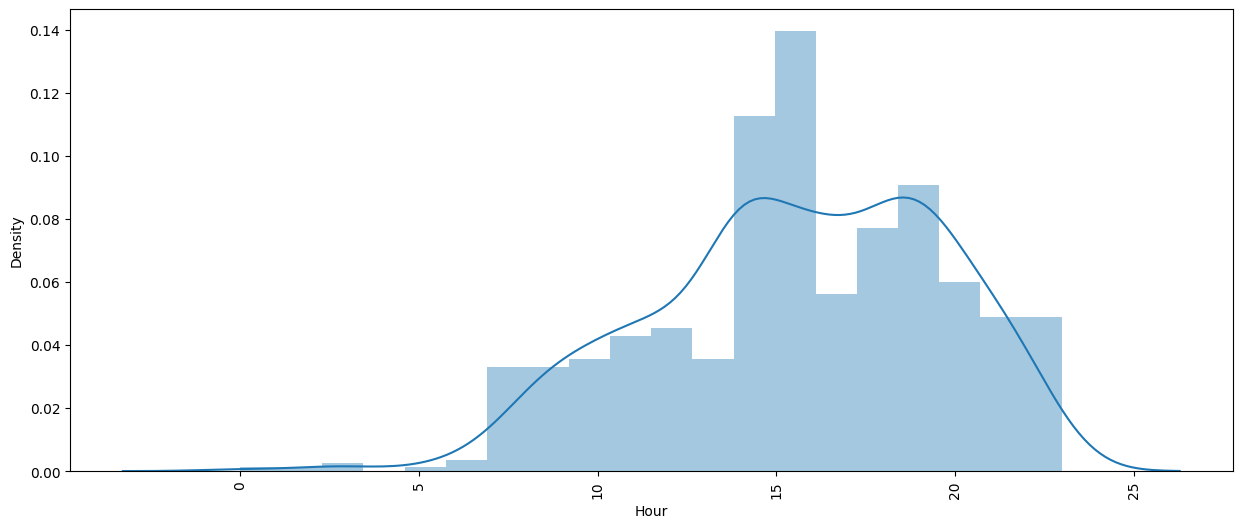

In [22]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

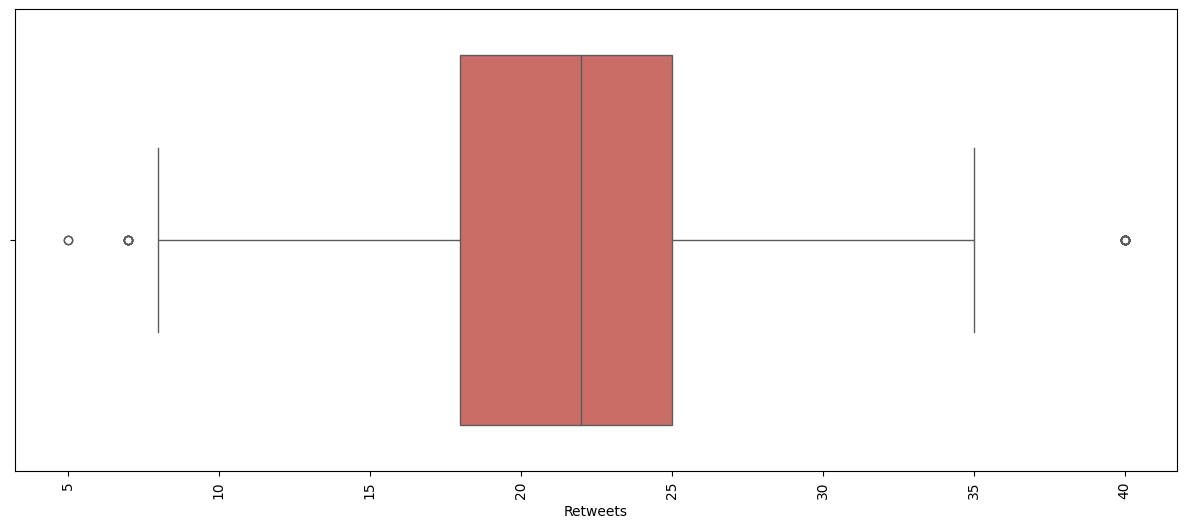

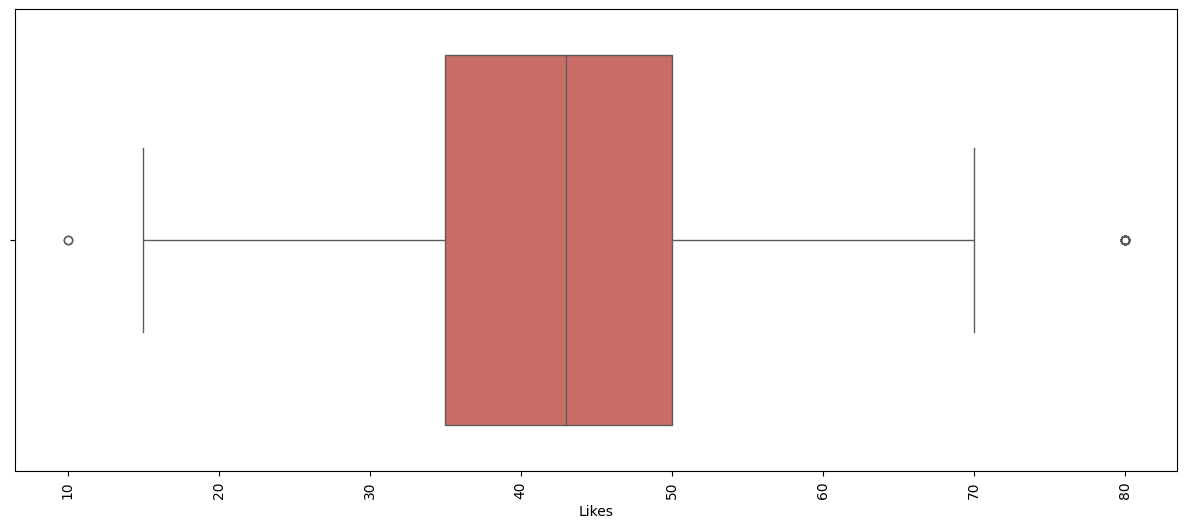

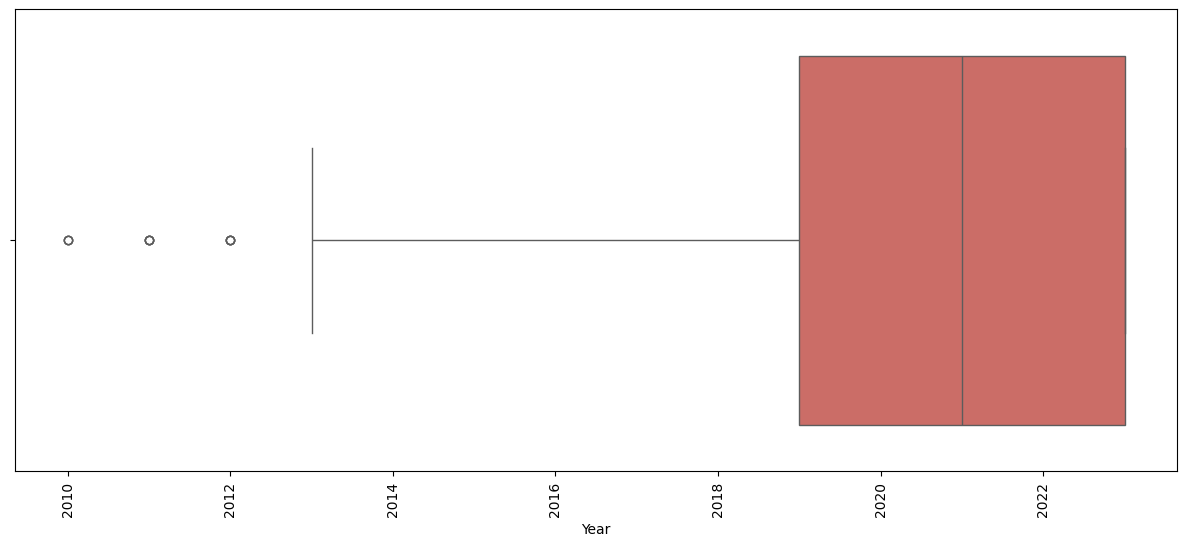

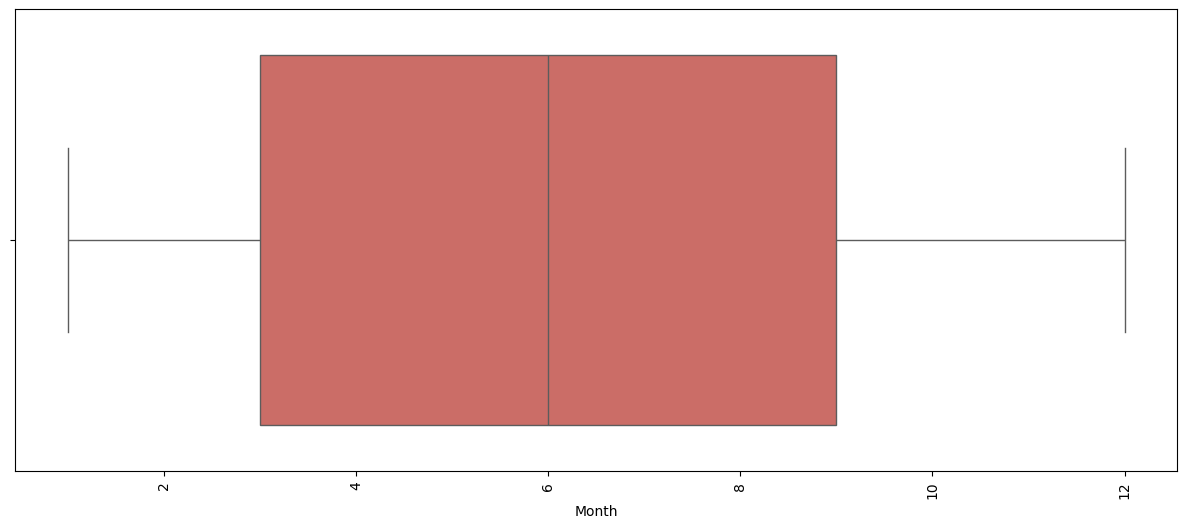

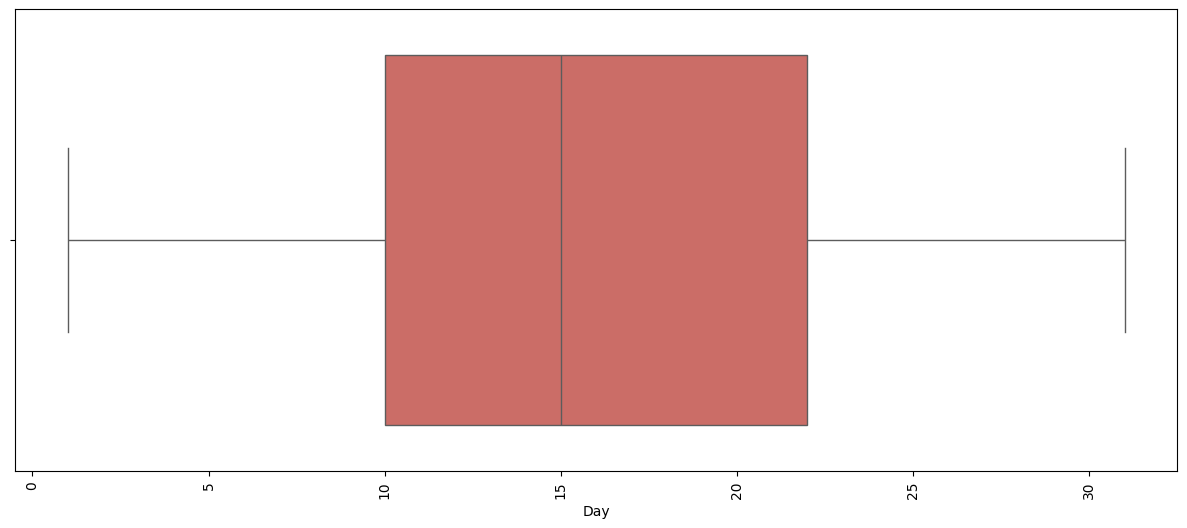

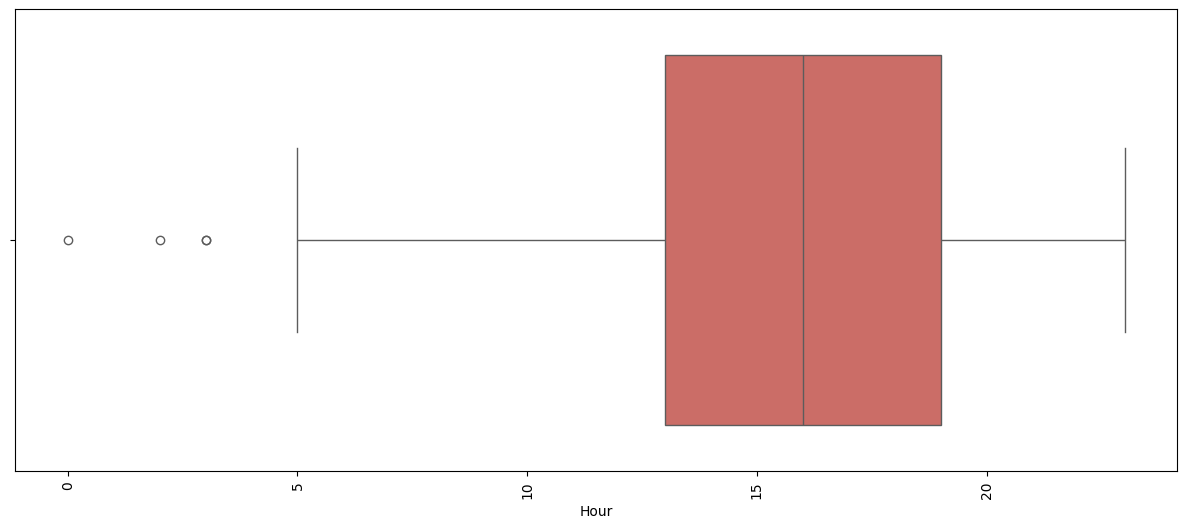

In [23]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

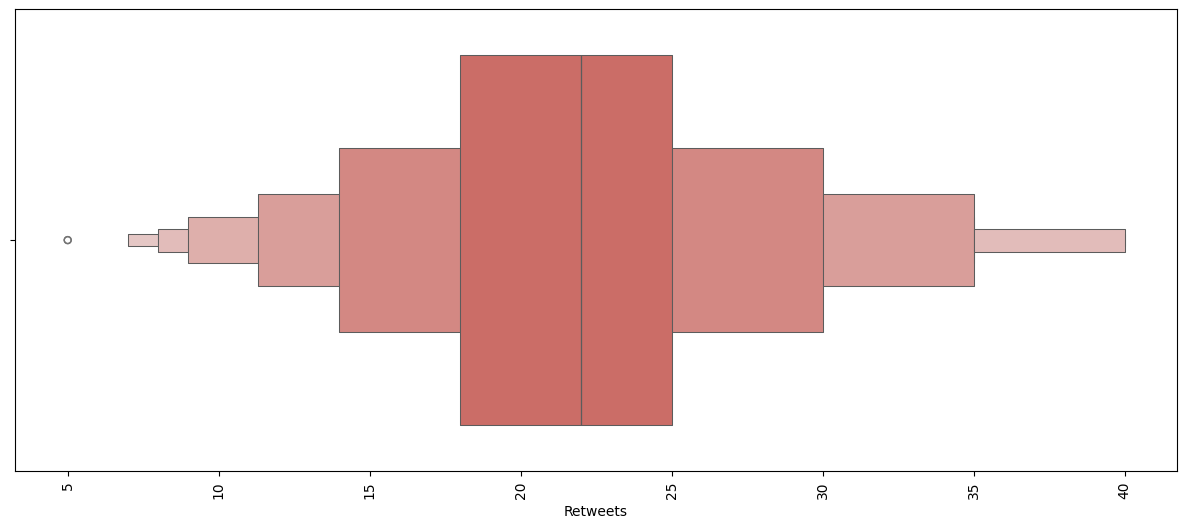

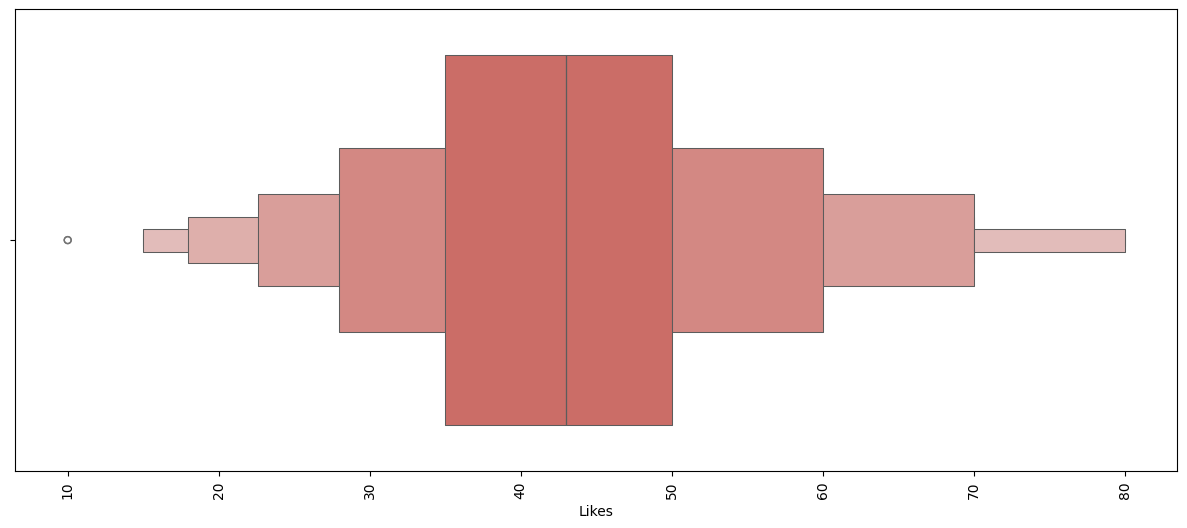

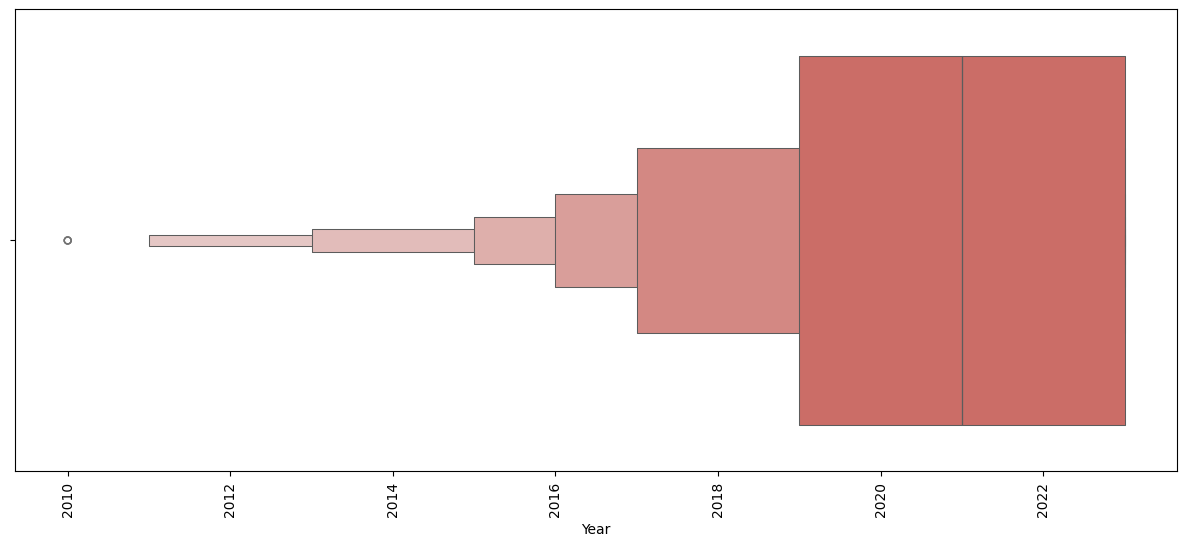

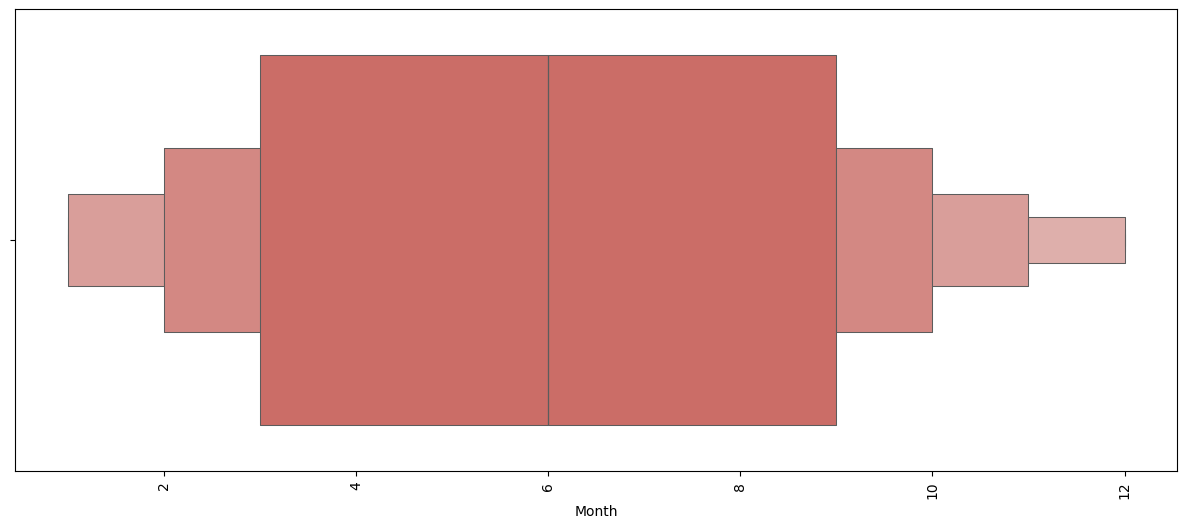

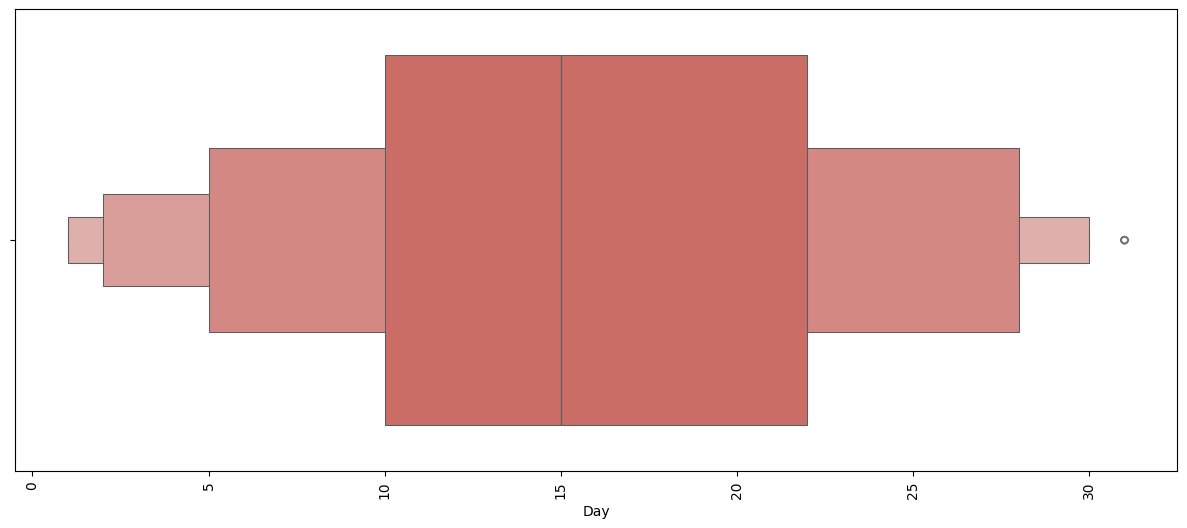

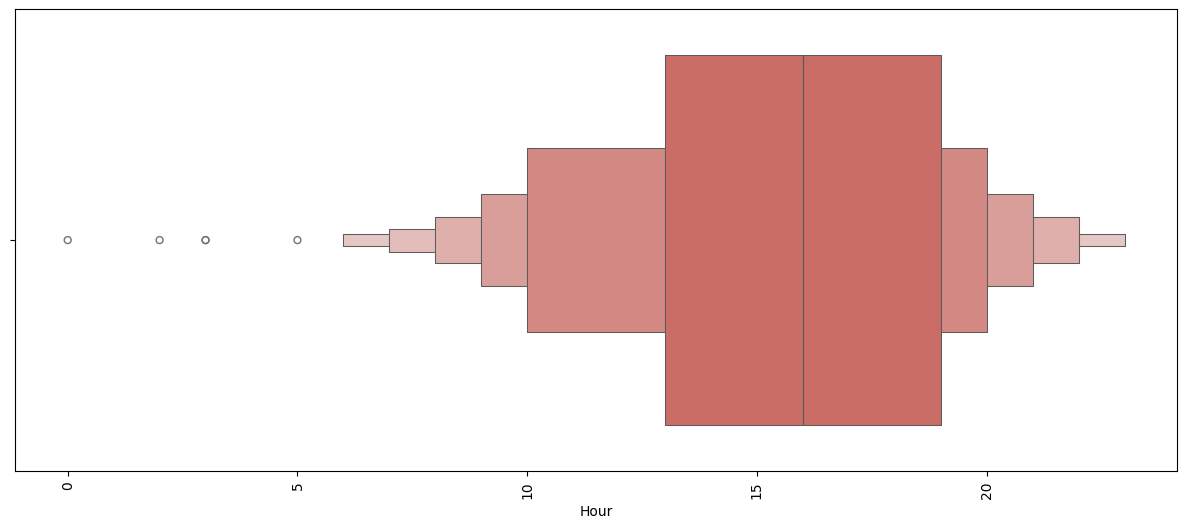

In [24]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

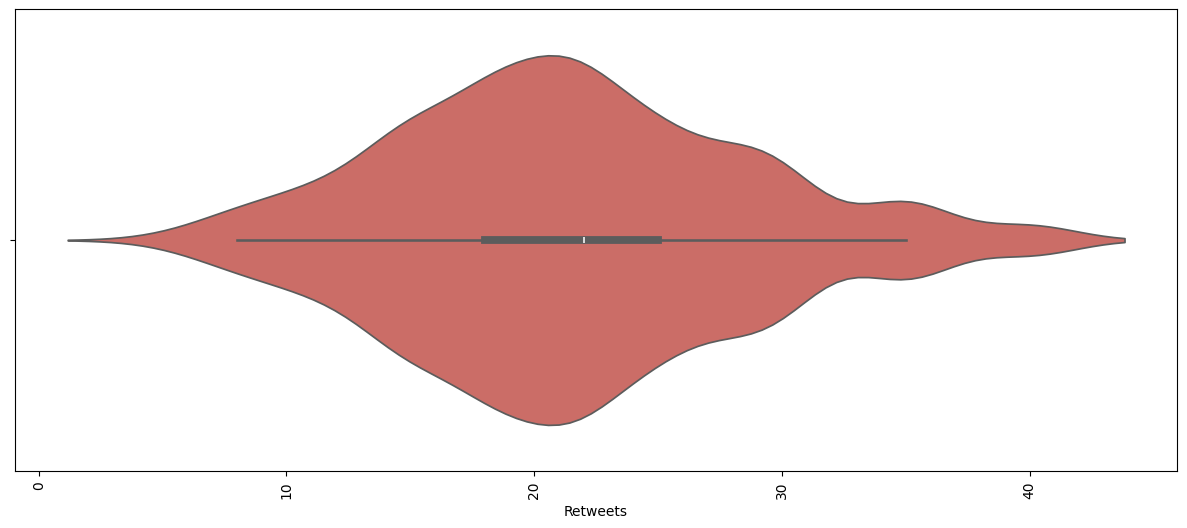

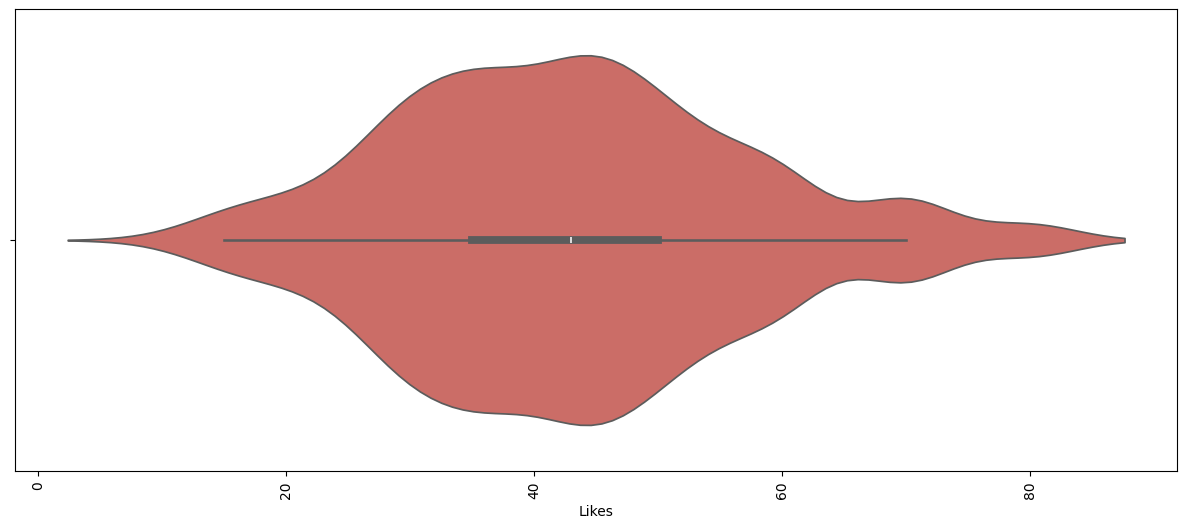

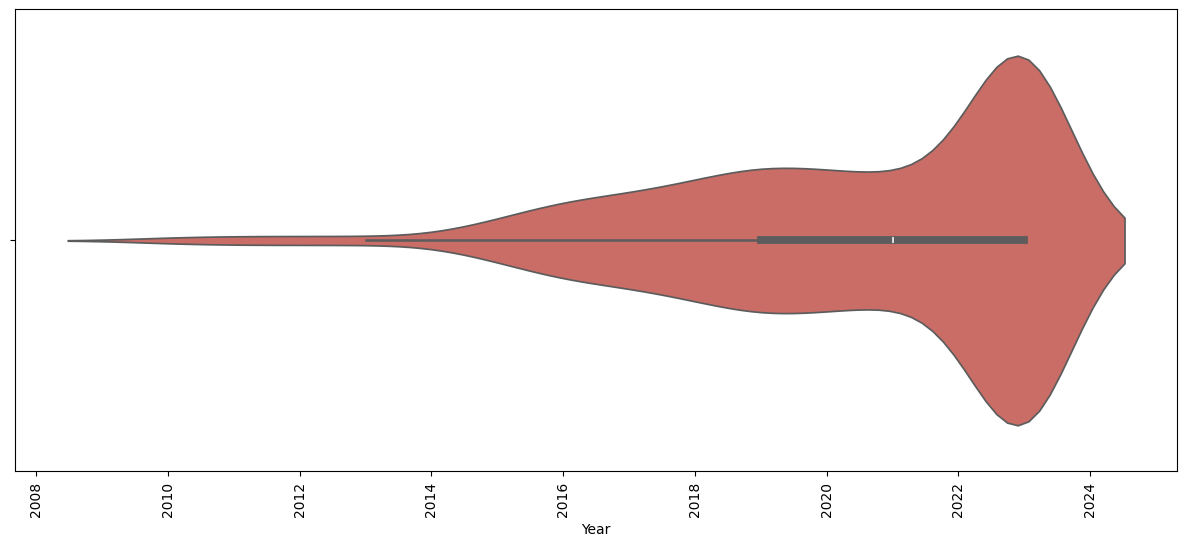

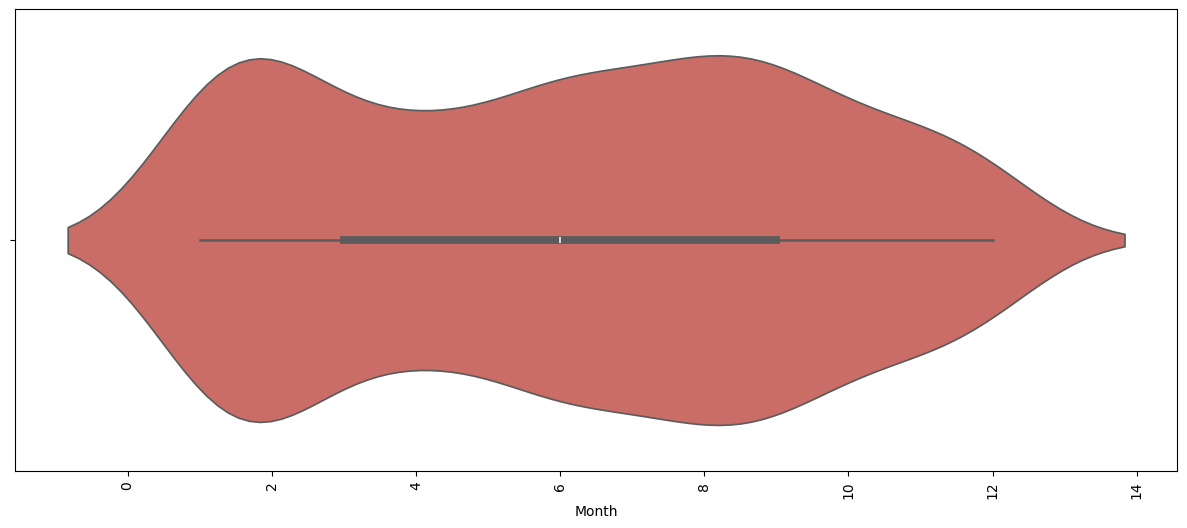

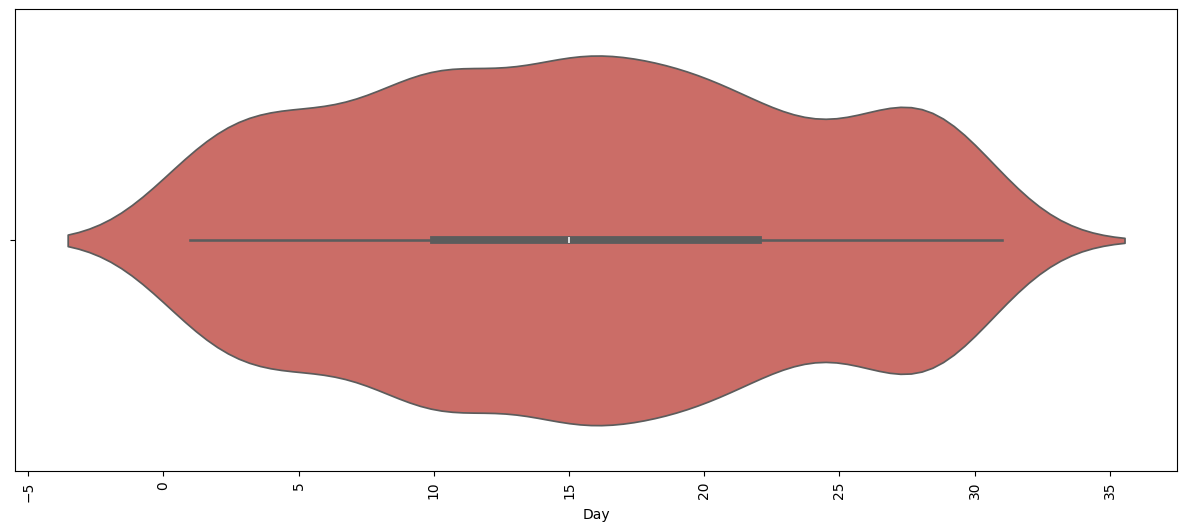

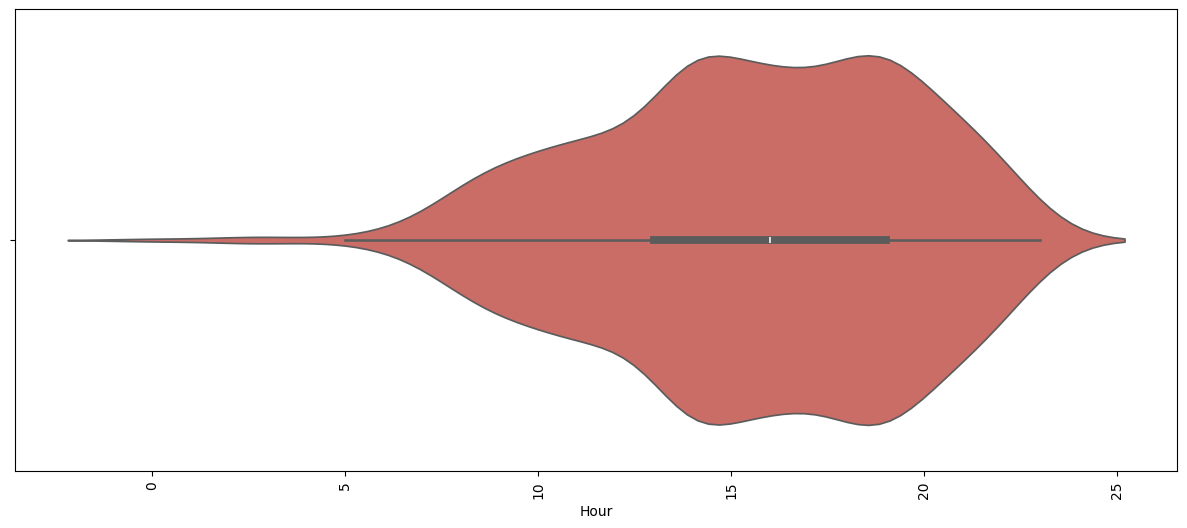

In [25]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [26]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Platform
['Twitter' 'Instagram' 'Facebook']



In [27]:
for i in categorical:
    print(df[i].value_counts())
    print()

Platform
Instagram    251
Twitter      236
Facebook     223
Name: count, dtype: int64



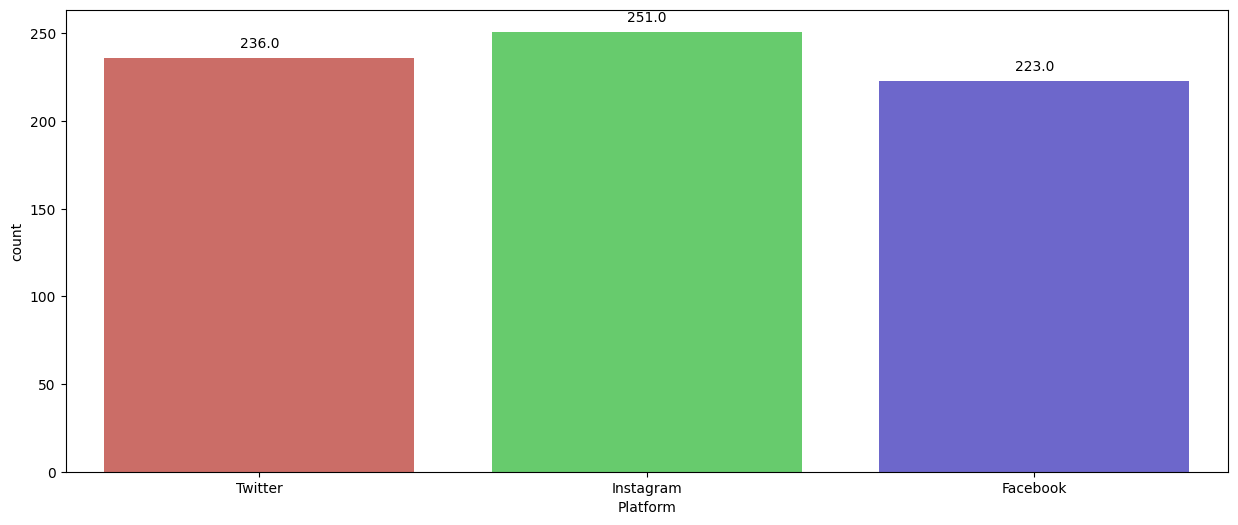

In [28]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

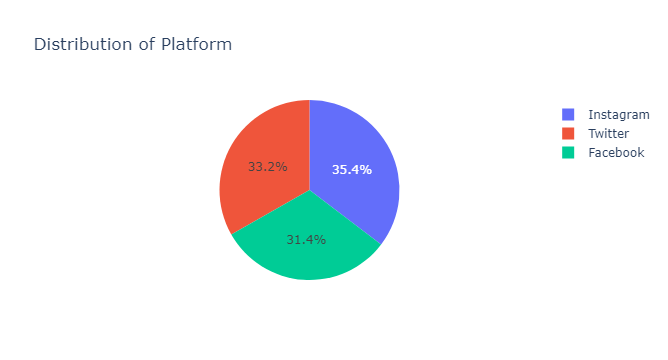

In [29]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

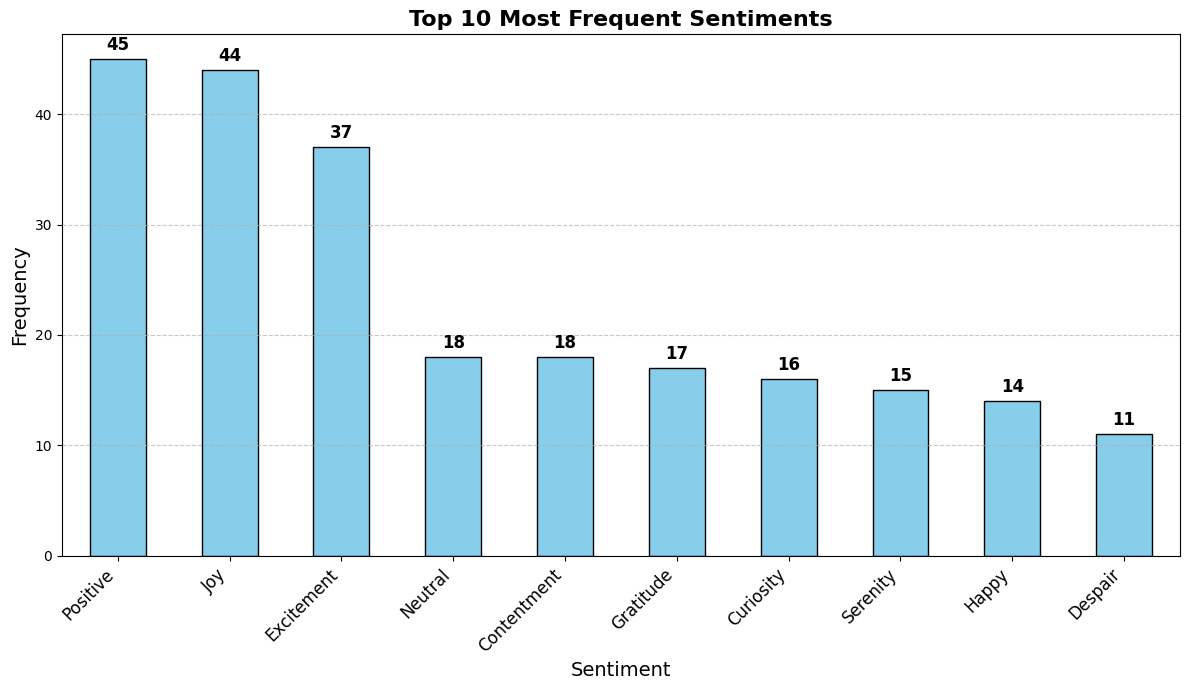

In [30]:
plt.figure(figsize=(12, 7))

top_10_sentiments = df['Sentiment'].value_counts().nlargest(10)

top_10_sentiments.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title('Top 10 Most Frequent Sentiments', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_10_sentiments):
    plt.text(
        index, 
        value + 0.5,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

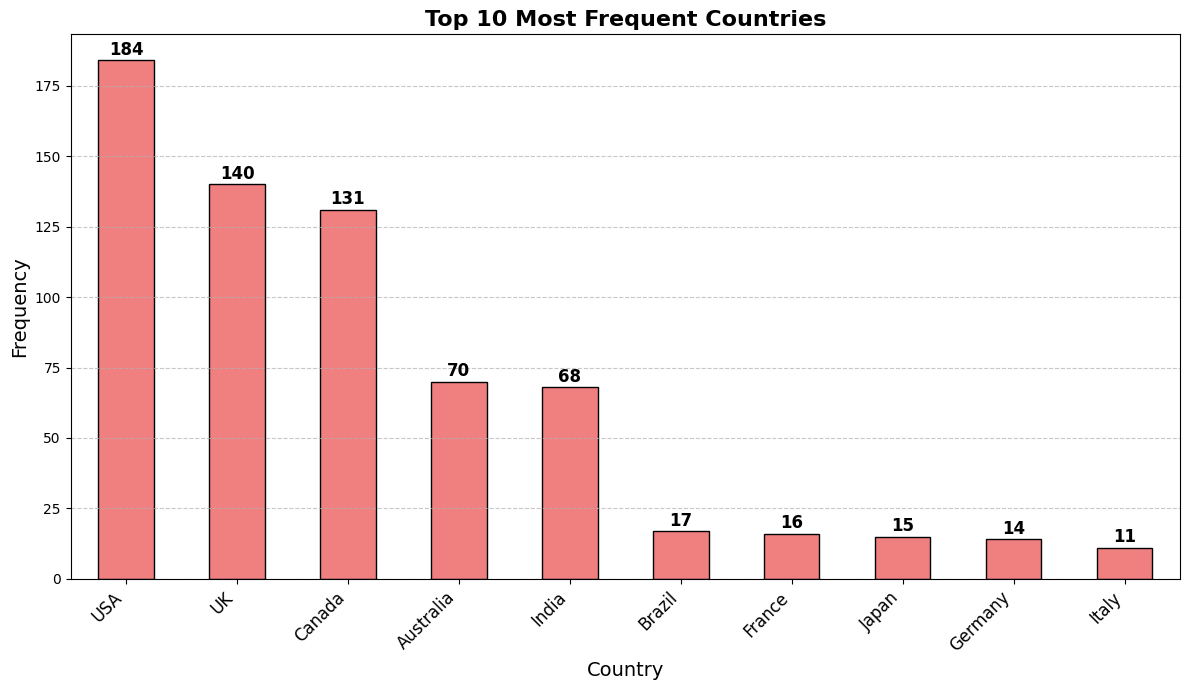

In [31]:
plt.figure(figsize=(12, 7))

top_10_countries = df['Country'].value_counts().nlargest(10)

top_10_countries.plot(
    kind='bar',
    color='lightcoral',
    edgecolor='black'
)

plt.title('Top 10 Most Frequent Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_10_countries):
    plt.text(
        index, 
        value + 0.5,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

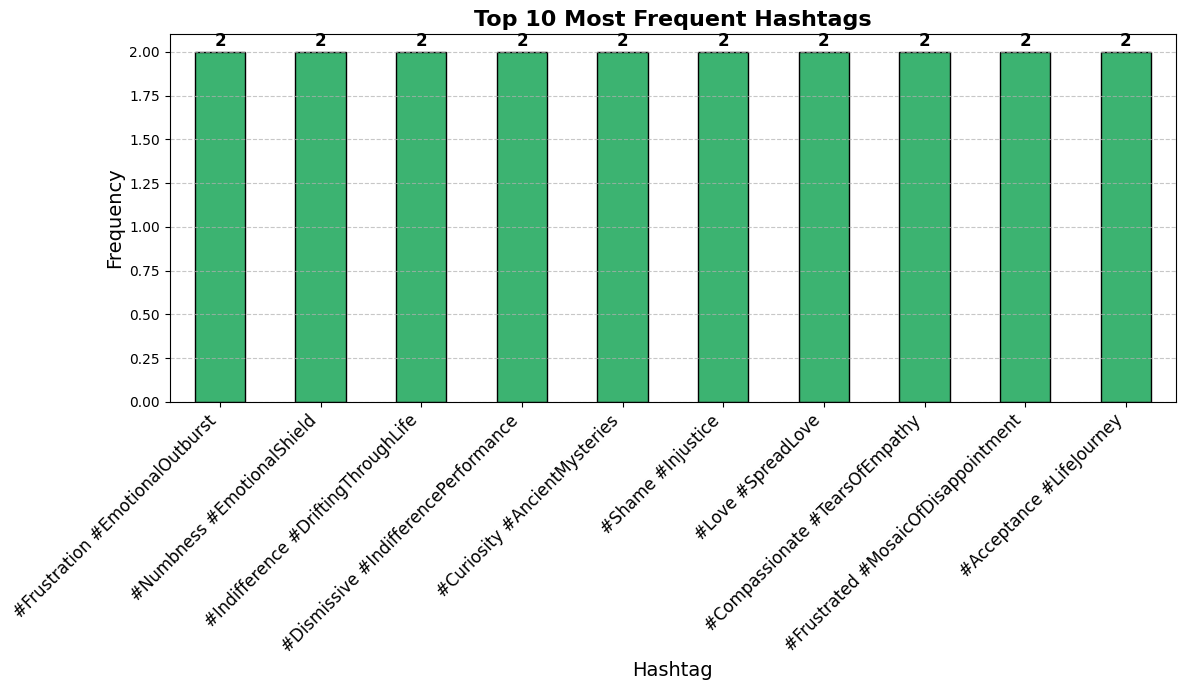

In [32]:
plt.figure(figsize=(12, 7))

top_10_hashtags = df['Hashtags'].value_counts().nlargest(10)

top_10_hashtags.plot(
    kind='bar',
    color='mediumseagreen',
    edgecolor='black'
)

plt.title('Top 10 Most Frequent Hashtags', fontsize=16, fontweight='bold')
plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_10_hashtags):
    plt.text(
        index, 
        value + 0.01,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
for col in numerical_columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Retweets: 5 | Maximum Retweets: 40
Minimum Likes: 10 | Maximum Likes: 80
Minimum Year: 2010 | Maximum Year: 2023
Minimum Month: 1 | Maximum Month: 12
Minimum Day: 1 | Maximum Day: 31
Minimum Hour: 0 | Maximum Hour: 23


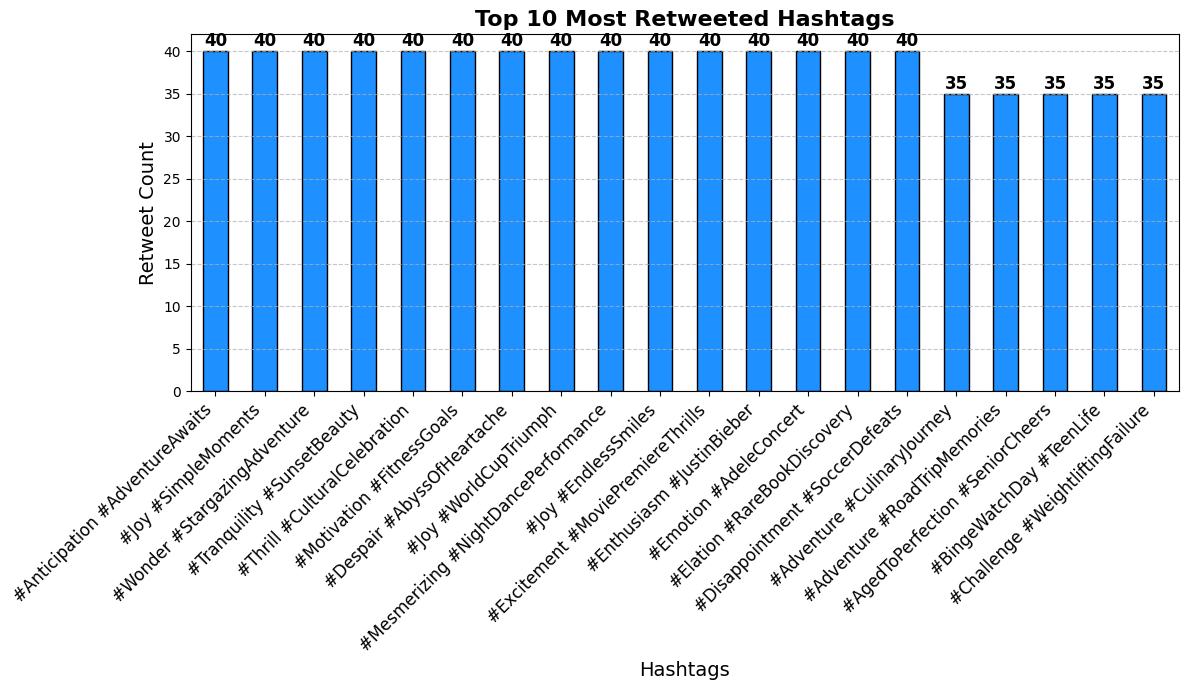

In [34]:
plt.figure(figsize=(12, 7))

top_10_retweeted_hashtags = df.groupby('Hashtags')['Retweets'].max().nlargest(20).sort_values(ascending=False)

top_10_retweeted_hashtags.plot(
    kind='bar',
    color='dodgerblue',
    edgecolor='black'
)

plt.title('Top 10 Most Retweeted Hashtags', fontsize=16, fontweight='bold')
plt.xlabel('Hashtags', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_10_retweeted_hashtags):
    plt.text(
        index, 
        value + 0.1,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

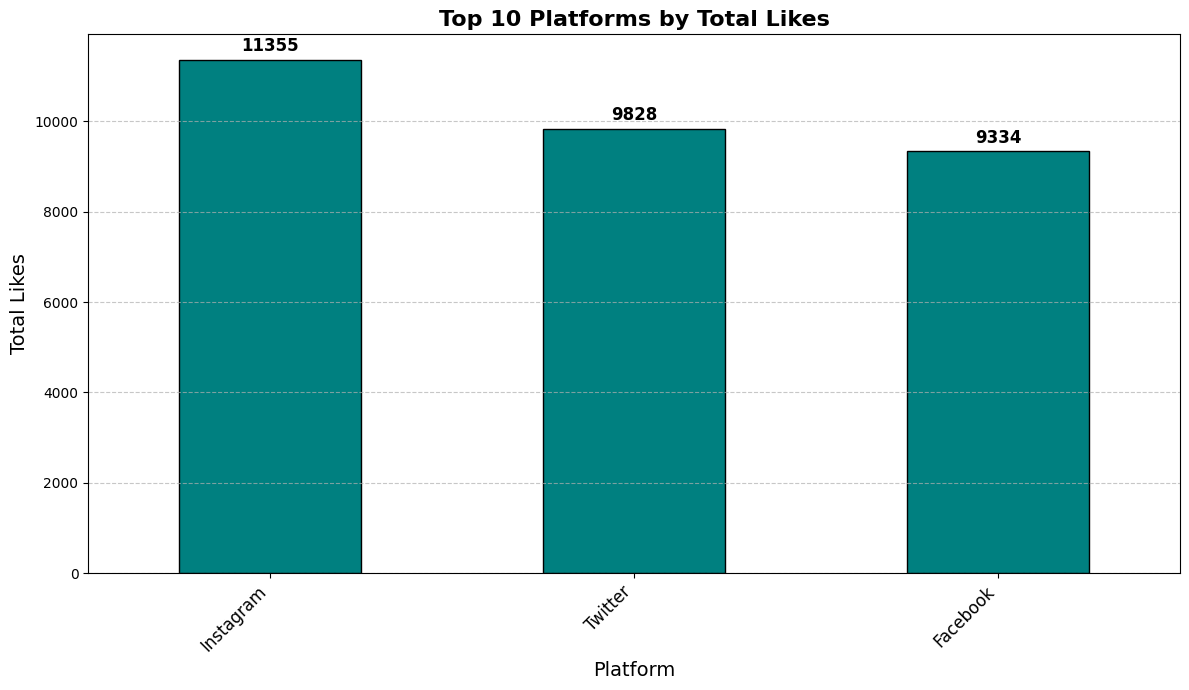

In [35]:
plt.figure(figsize=(12, 7))
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Top 10 Platforms by Total Likes', fontsize=16, fontweight='bold')
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Likes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_likes_platform):
    plt.text(
        index, 
        value + 100,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

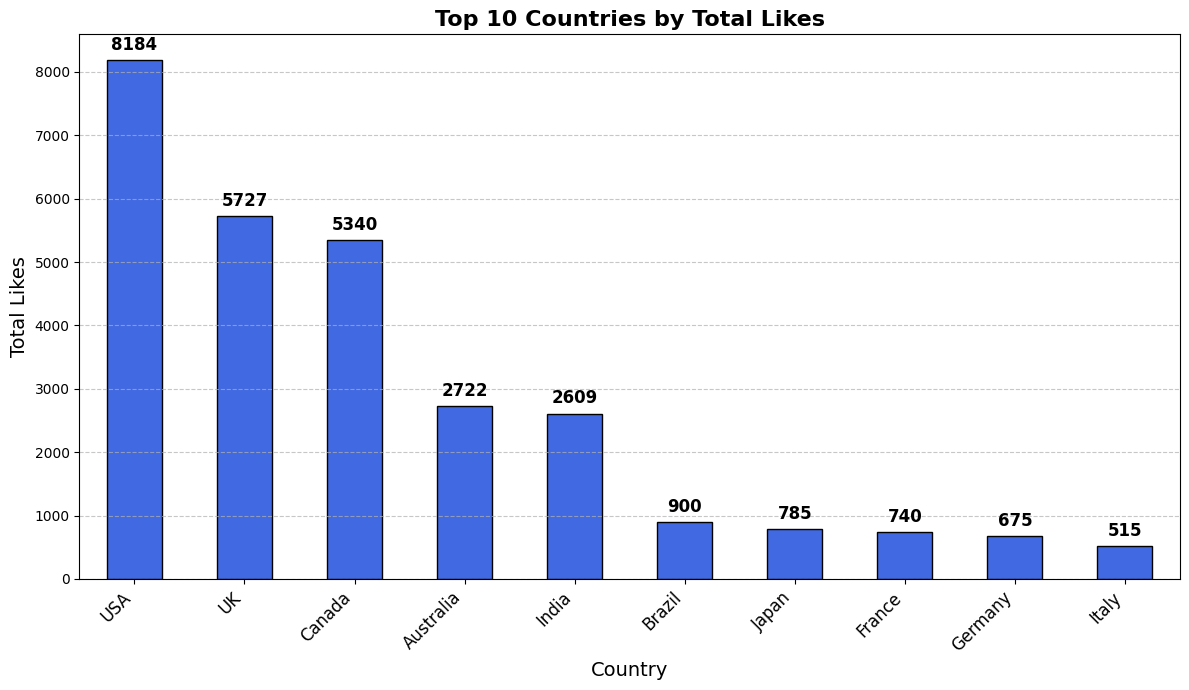

In [36]:
plt.figure(figsize=(12, 7))
top_country_likes = df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(
    kind='bar',
    color='royalblue',
    edgecolor='black'
)
plt.title('Top 10 Countries by Total Likes', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Likes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_country_likes):
    plt.text(
        index, 
        value + 100,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

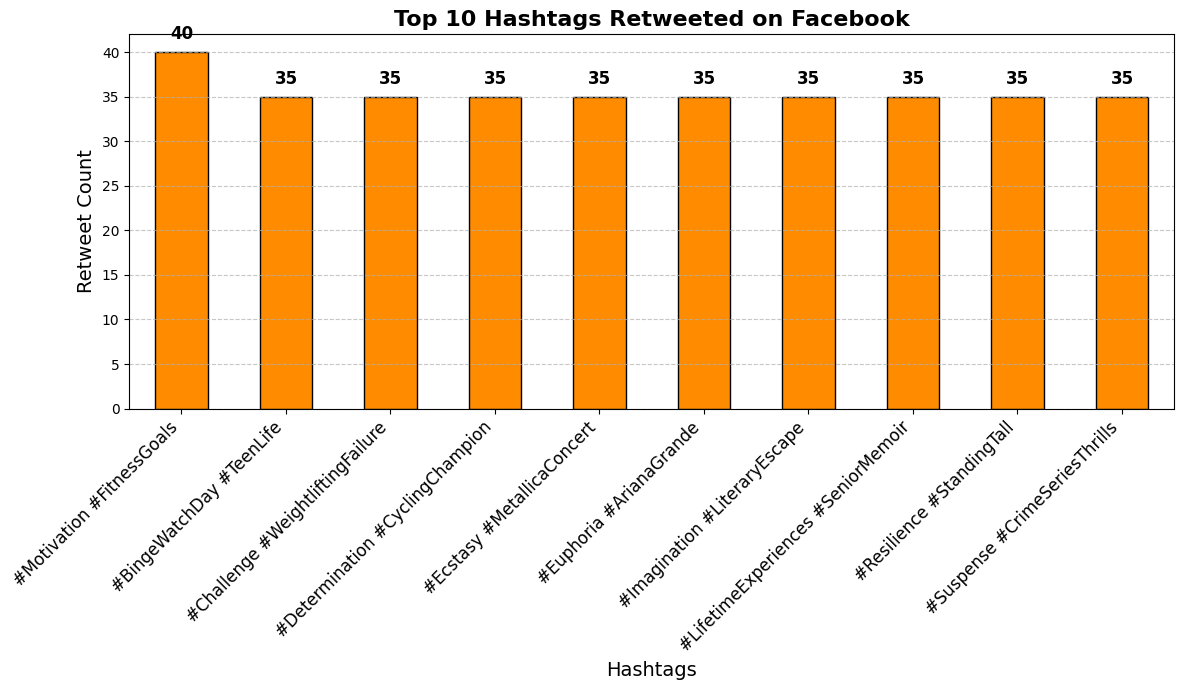

In [38]:
plt.figure(figsize=(12, 7))
H_R_f = Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(
    kind='bar',
    color='darkorange',
    edgecolor='black'
)
plt.title('Top 10 Hashtags Retweeted on Facebook', fontsize=16, fontweight='bold')
plt.xlabel('Hashtags', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(H_R_f):
    plt.text(
        index, 
        value + 1,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

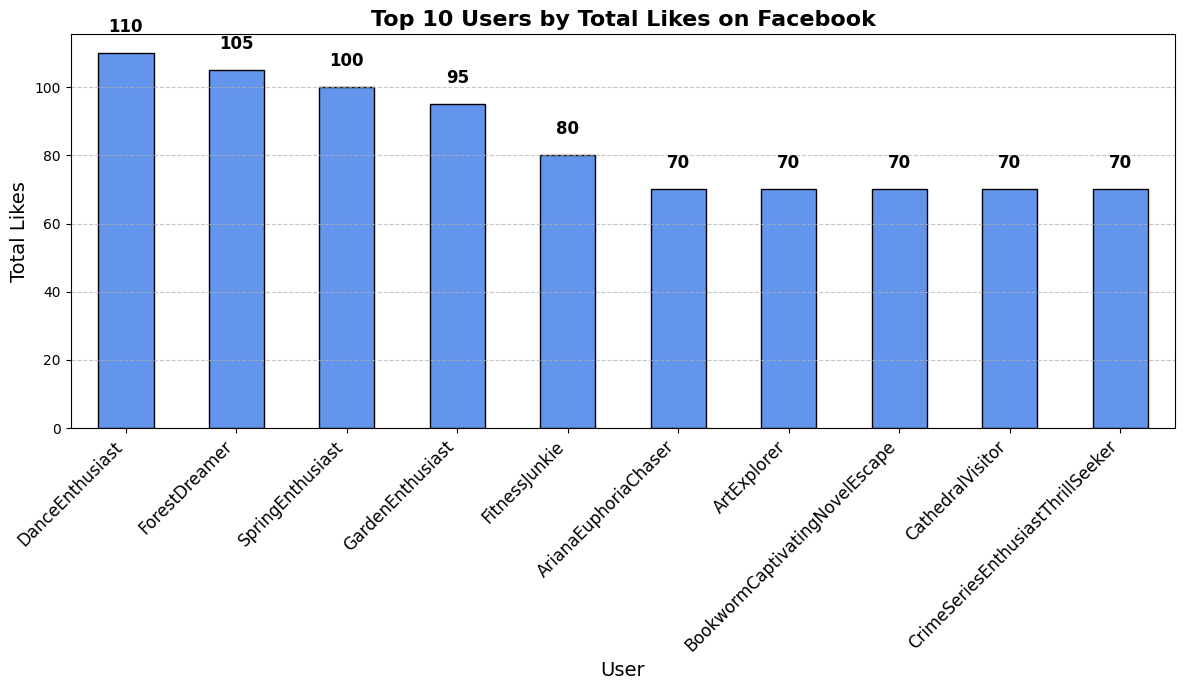

In [39]:
plt.figure(figsize=(12, 7))
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(
    kind='bar',
    color='cornflowerblue',
    edgecolor='black'
)
plt.title('Top 10 Users by Total Likes on Facebook', fontsize=16, fontweight='bold')
plt.xlabel('User', fontsize=14)
plt.ylabel('Total Likes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_likes_platform_F):
    plt.text(
        index, 
        value + 5,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

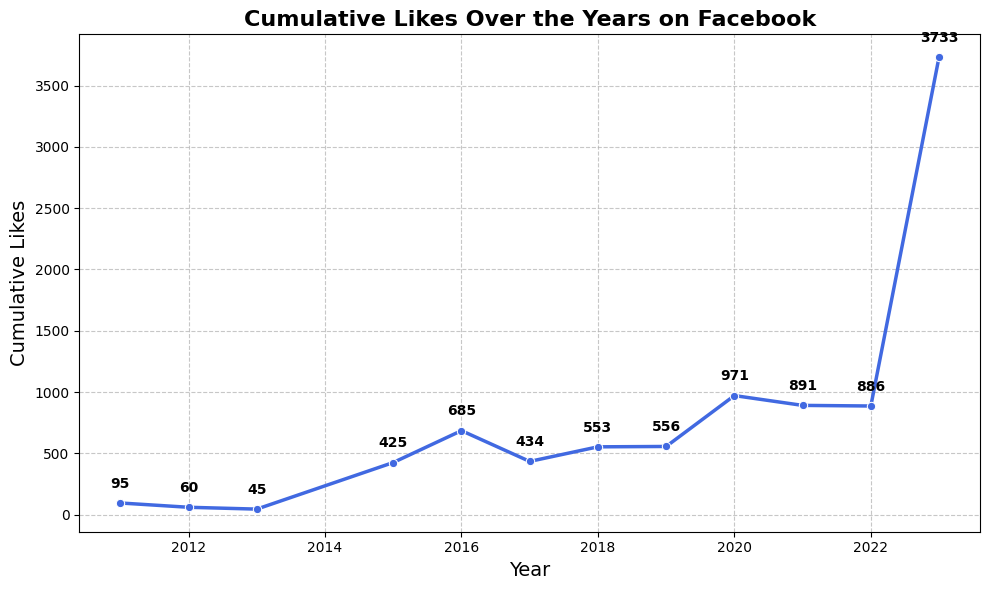

In [40]:
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o', color='royalblue', linewidth=2.5)

for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'] + 100, str(value['Likes']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Cumulative Likes Over the Years on Facebook', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Likes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

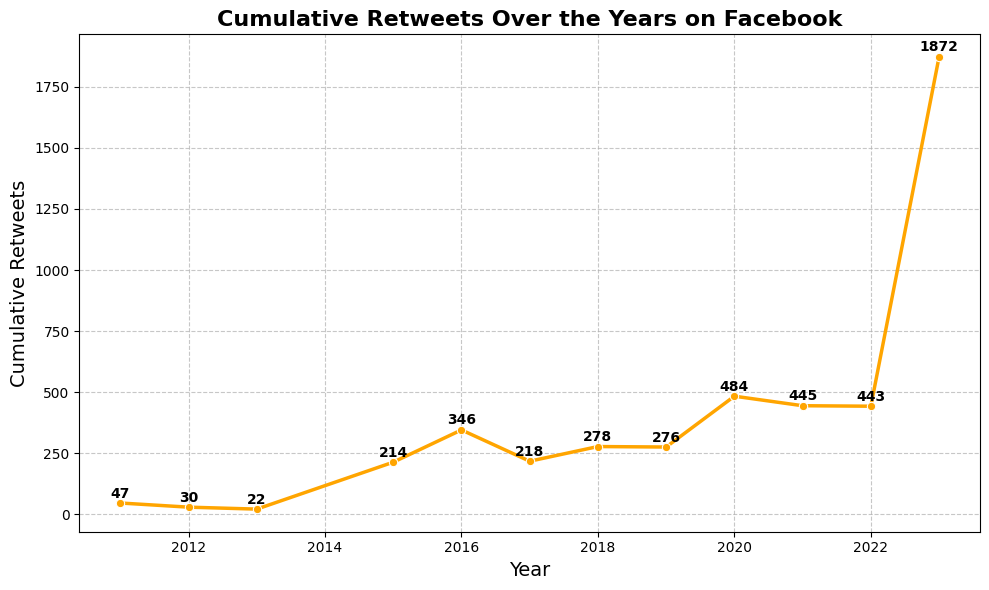

In [41]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o', color='orange', linewidth=2.5)

for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'] + 10, str(value['Retweets']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Cumulative Retweets Over the Years on Facebook', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Retweets', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

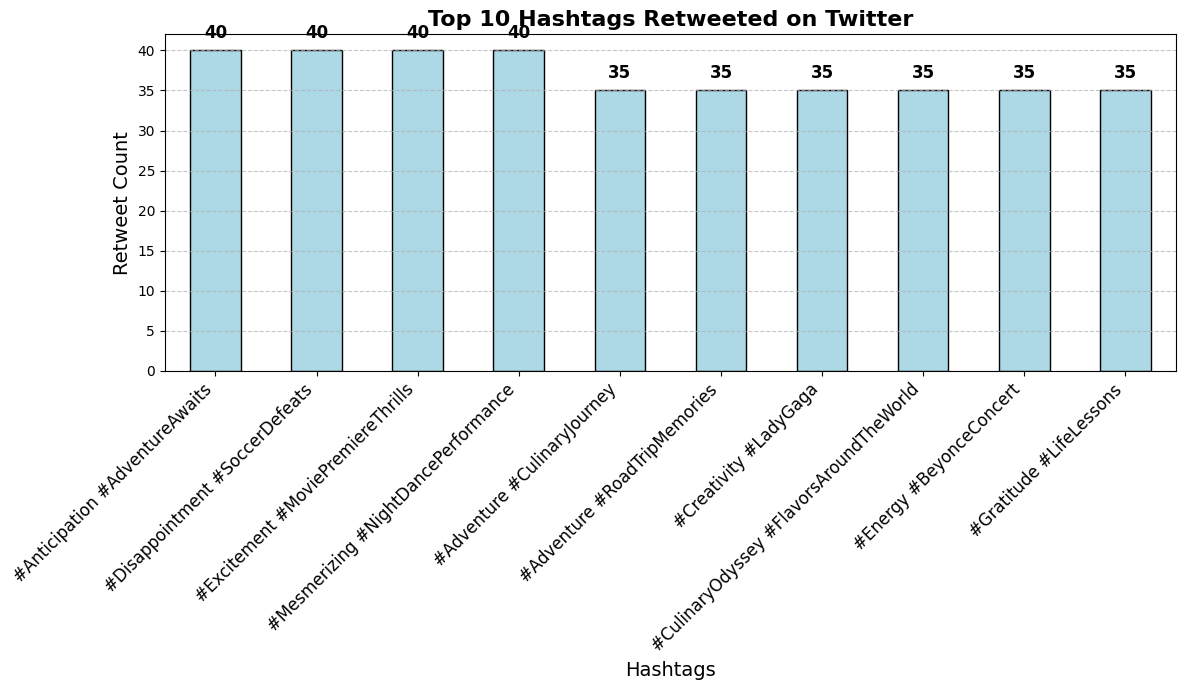

In [42]:
plt.figure(figsize=(12, 7))
H_R_t = Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(
    kind='bar',
    color='lightblue',
    edgecolor='black'
)
plt.title('Top 10 Hashtags Retweeted on Twitter', fontsize=16, fontweight='bold')
plt.xlabel('Hashtags', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(H_R_t):
    plt.text(
        index, 
        value + 1,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

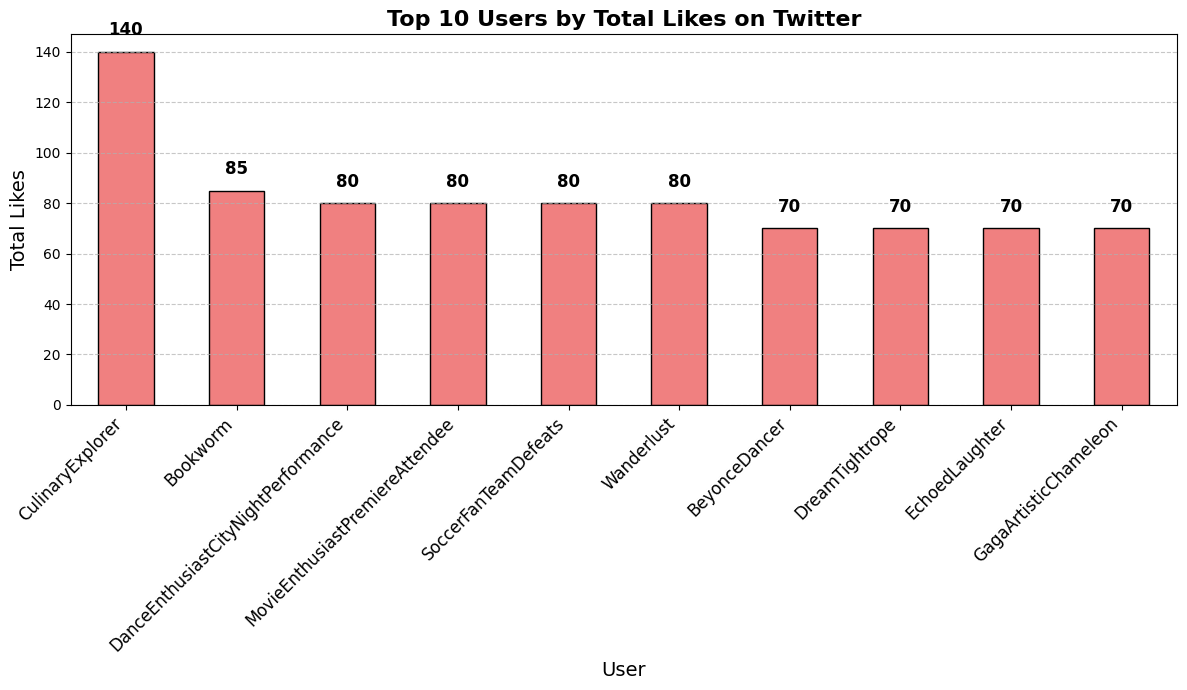

In [43]:
plt.figure(figsize=(12, 7))
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(
    kind='bar',
    color='lightcoral',
    edgecolor='black'
)
plt.title('Top 10 Users by Total Likes on Twitter', fontsize=16, fontweight='bold')
plt.xlabel('User', fontsize=14)
plt.ylabel('Total Likes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_likes_platform_t):
    plt.text(
        index, 
        value + 5,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

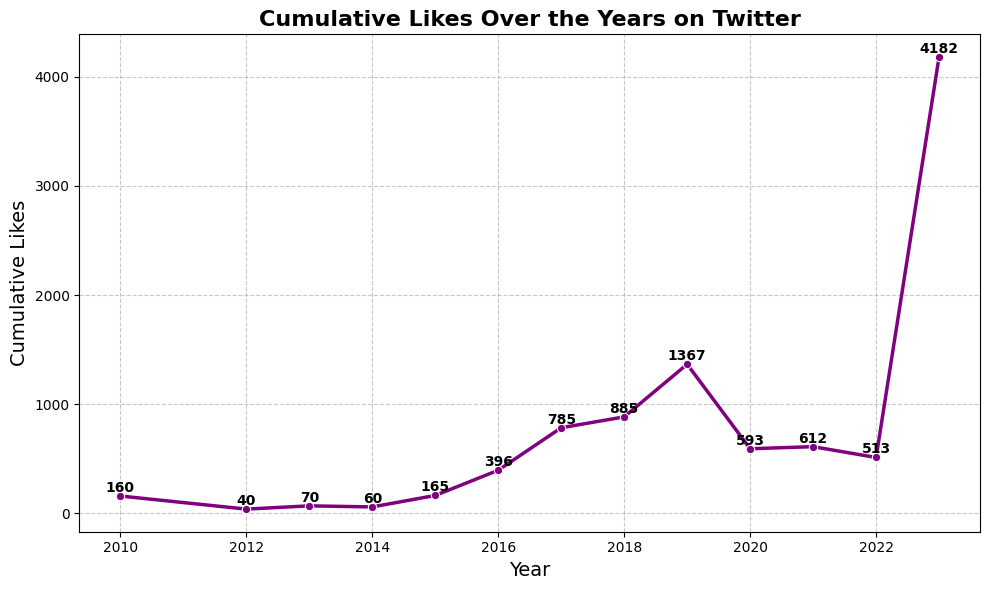

In [44]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o', color='purple', linewidth=2.5)

for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'] + 10, str(value['Likes']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Cumulative Likes Over the Years on Twitter', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Likes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

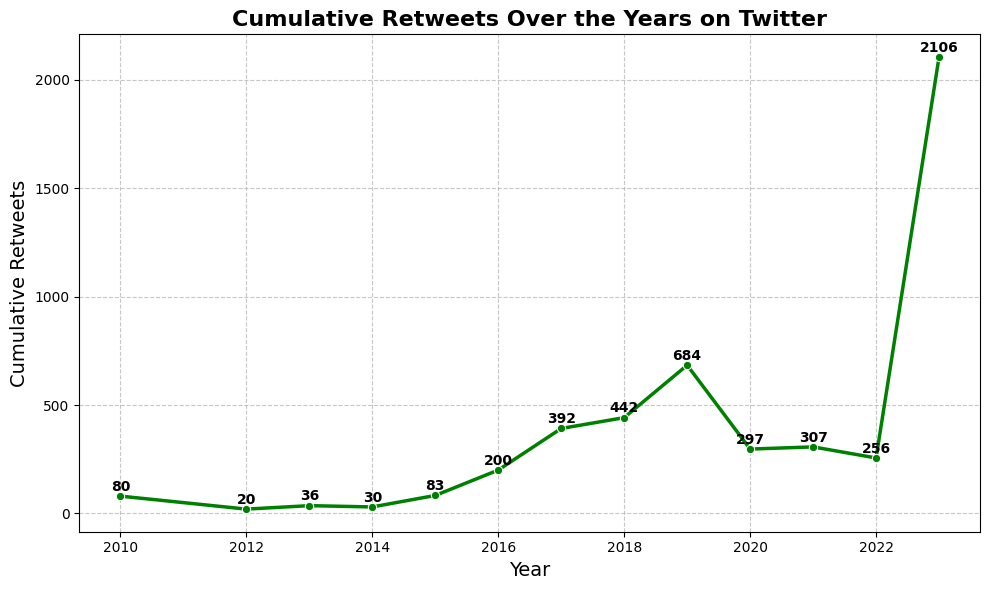

In [45]:
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o', color='green', linewidth=2.5)

for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'] + 10, str(value['Retweets']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Cumulative Retweets Over the Years on Twitter', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Retweets', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

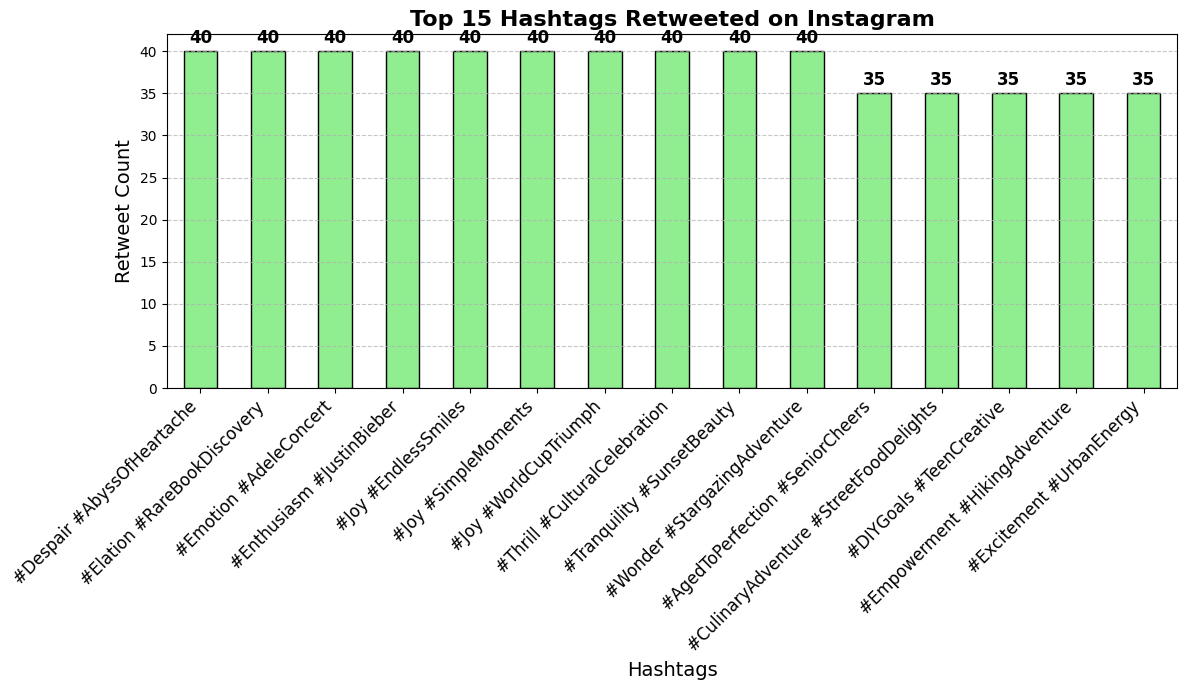

In [46]:
plt.figure(figsize=(12, 7))
H_R_i = Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(
    kind='bar',
    color='lightgreen',
    edgecolor='black'
)
plt.title('Top 15 Hashtags Retweeted on Instagram', fontsize=16, fontweight='bold')
plt.xlabel('Hashtags', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(H_R_i):
    plt.text(
        index, 
        value + 0.5,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

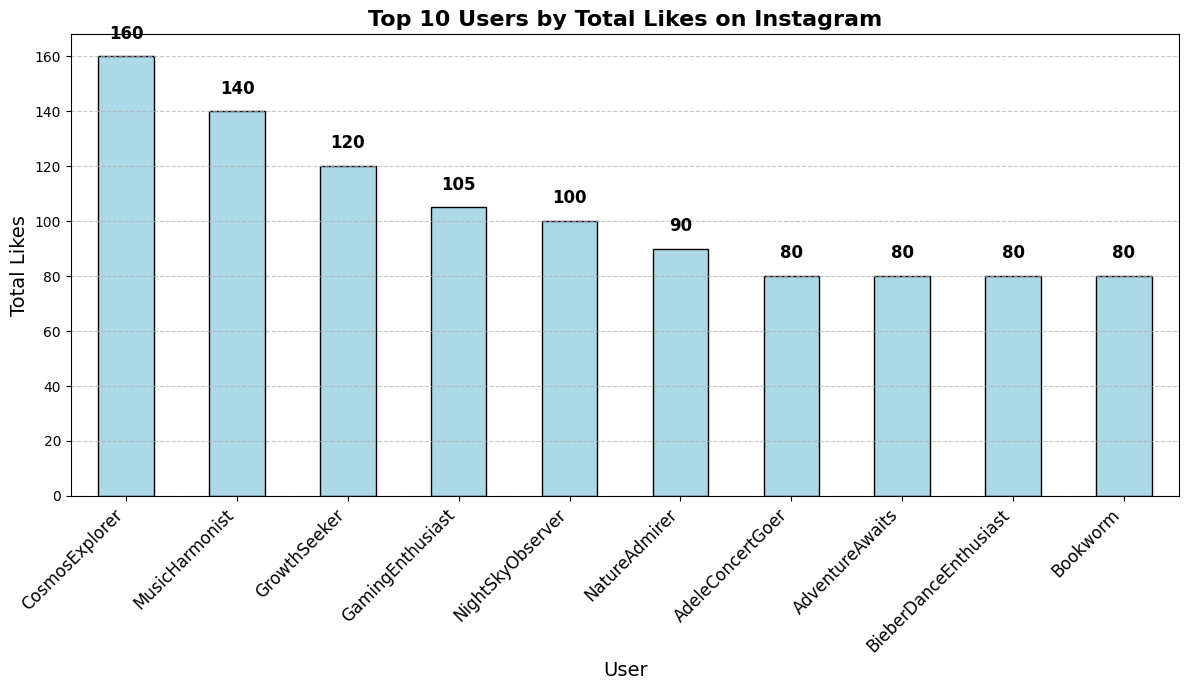

In [47]:
plt.figure(figsize=(12, 7))
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(
    kind='bar',
    color='lightblue',
    edgecolor='black'
)
plt.title('Top 10 Users by Total Likes on Instagram', fontsize=16, fontweight='bold')
plt.xlabel('User', fontsize=14)
plt.ylabel('Total Likes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(top_likes_platform_i):
    plt.text(
        index, 
        value + 5,  
        str(value), 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

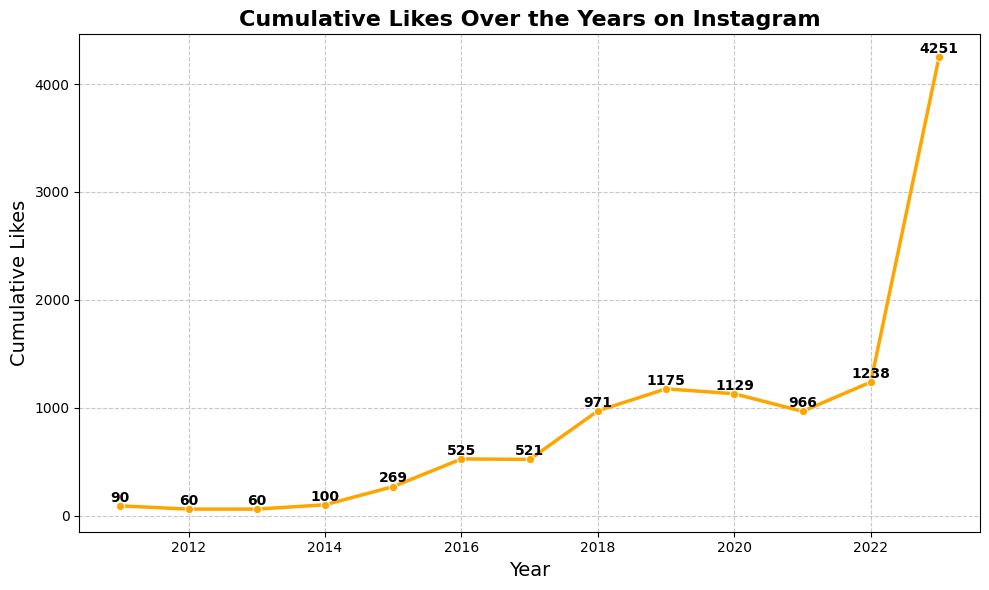

In [48]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o', color='orange', linewidth=2.5)

for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'] + 10, str(value['Likes']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Cumulative Likes Over the Years on Instagram', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Likes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

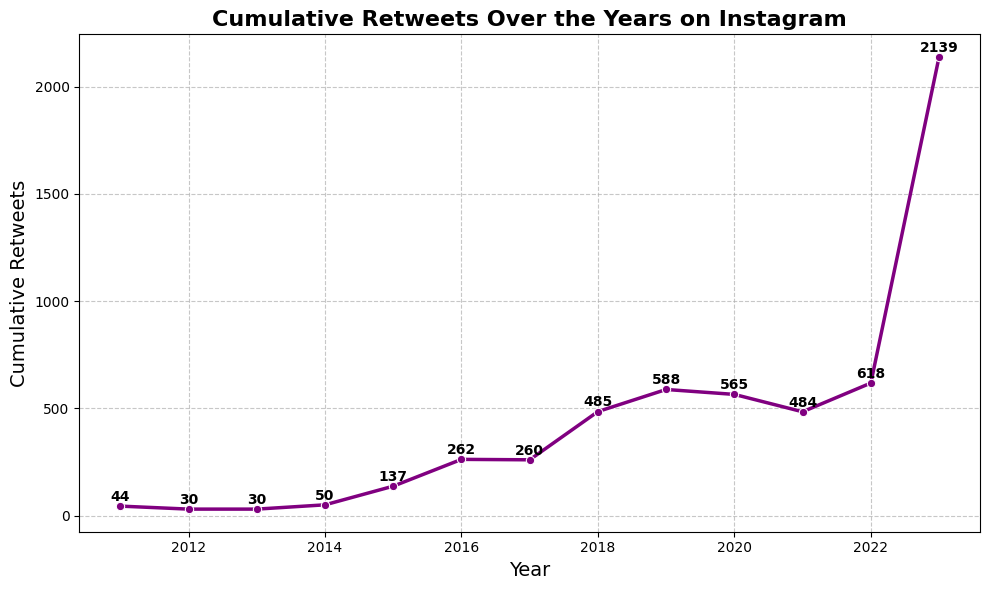

In [49]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o', color='purple', linewidth=2.5)

for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'] + 10, str(value['Retweets']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Cumulative Retweets Over the Years on Instagram', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Retweets', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

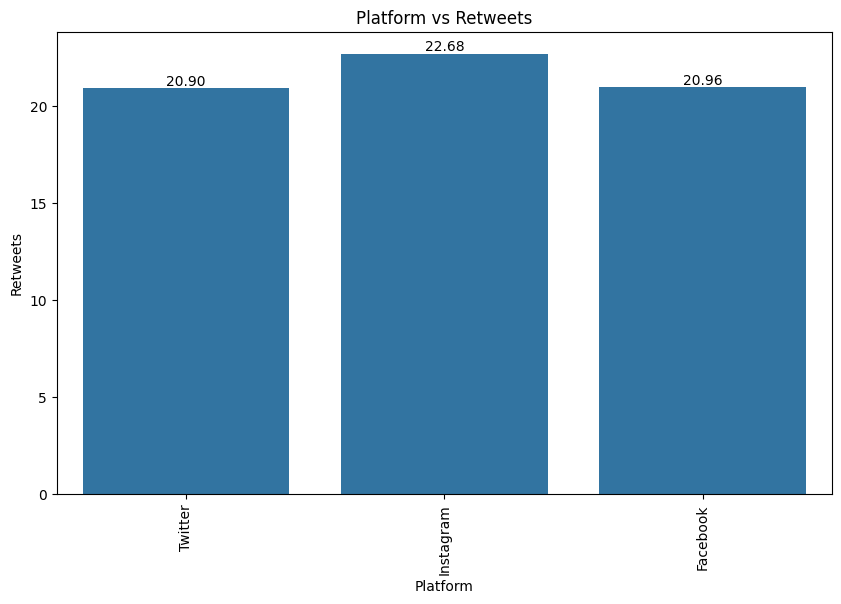

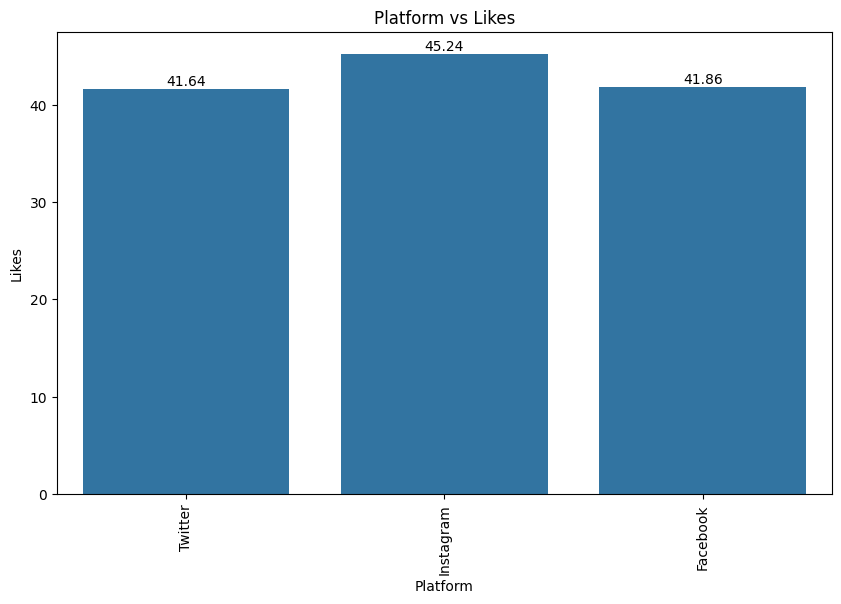

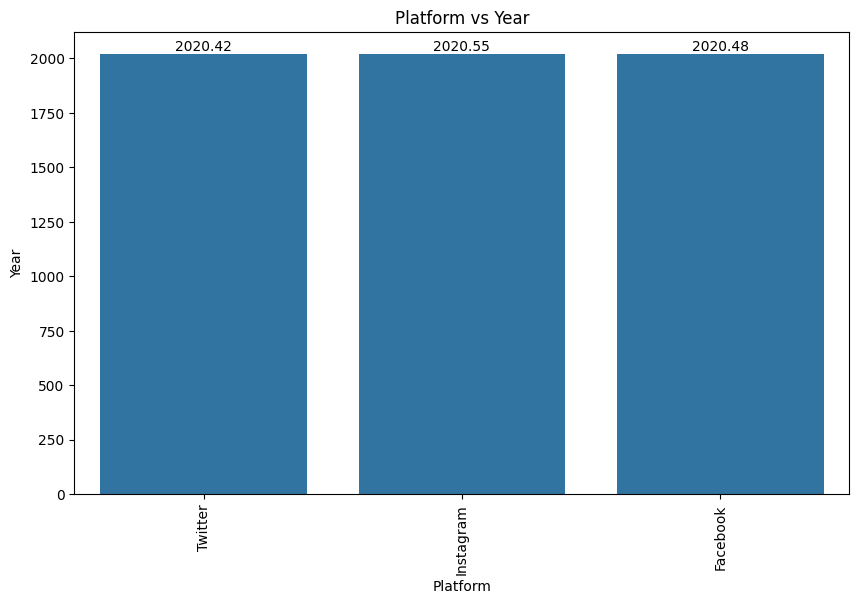

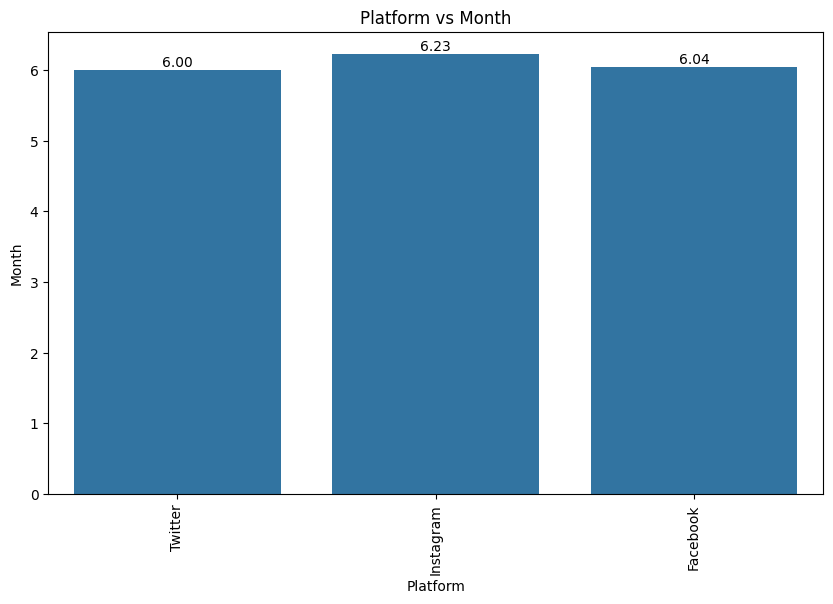

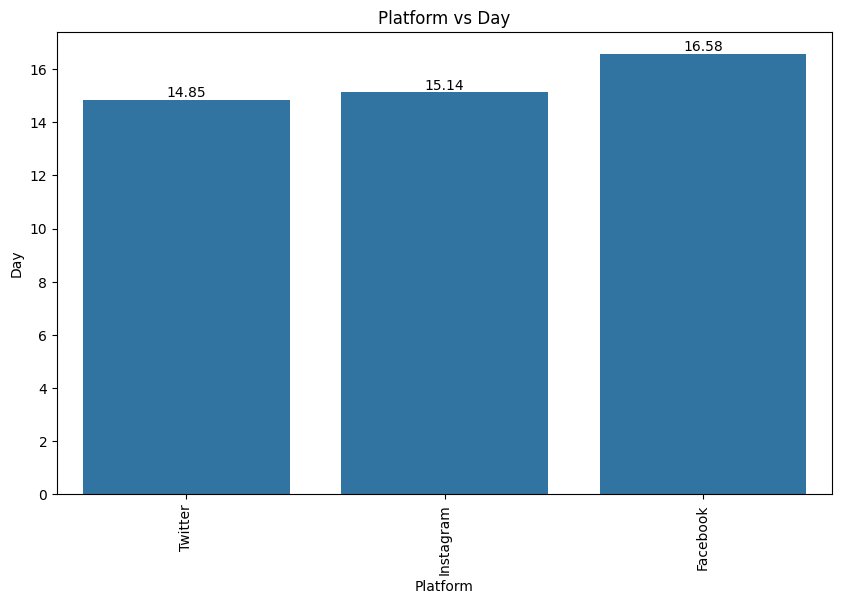

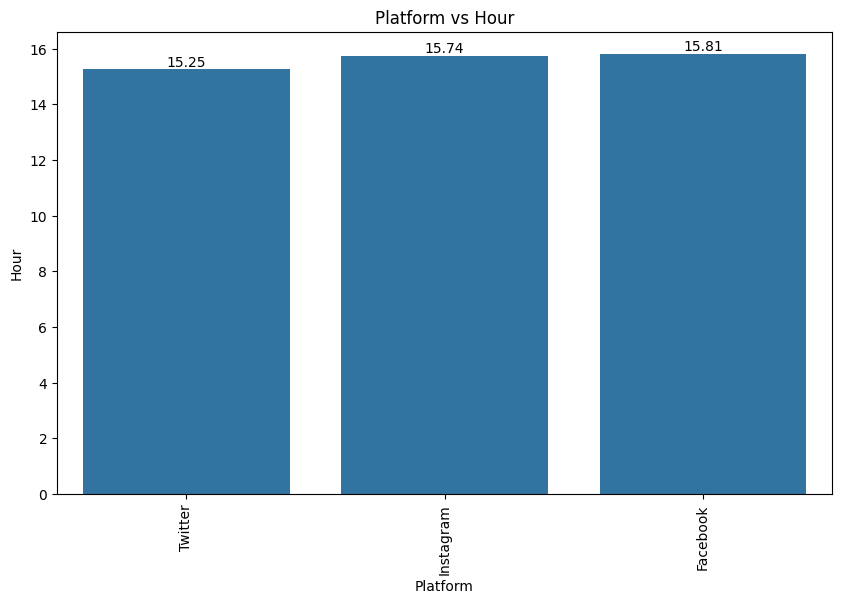

In [50]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

In [51]:
import textblob

In [52]:
df_new = df[['Text', 'Sentiment']]

In [53]:
df_new

Text Sentiment
0                Enjoying a beautiful day at the park!  Positive
1                   Traffic was terrible this morning.  Negative
2                  Just finished an amazing workout! 💪  Positive
3          Excited about the upcoming weekend getaway!  Positive
4          Trying out a new recipe for dinner tonight.   Neutral
..                                                 ...       ...
727  Collaborating on a science project that receiv...     Happy
728  Attending a surprise birthday party organized ...     Happy
729  Successfully fundraising for a school charity ...     Happy
730  Participating in a multicultural festival, cel...     Happy
731  Organizing a virtual talent show during challe...     Happy

[710 rows x 2 columns]

In [54]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [55]:
df_new['Text'] = df_new['Text'].apply(lambda x: clean_text(x))

In [56]:
df_new['Text']

0                  enjoying a beautiful day at the park!
1                     traffic was terrible this morning.
2                    just finished an amazing workout! 💪
3            excited about the upcoming weekend getaway!
4            trying out a new recipe for dinner tonight.
                             ...                        
727    collaborating on a science project that receiv...
728    attending a surprise birthday party organized ...
729    successfully fundraising for a school charity ...
730    participating in a multicultural festival, cel...
731    organizing a virtual talent show during challe...
Name: Text, Length: 710, dtype: object

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [59]:
df_new['Text']= df_new['Text'].apply(lambda x:remove_punctuation(x))

In [60]:
df_new['Text']

0                   enjoying a beautiful day at the park
1                      traffic was terrible this morning
2                     just finished an amazing workout 💪
3             excited about the upcoming weekend getaway
4             trying out a new recipe for dinner tonight
                             ...                        
727    collaborating on a science project that receiv...
728    attending a surprise birthday party organized ...
729    successfully fundraising for a school charity ...
730    participating in a multicultural festival cele...
731    organizing a virtual talent show during challe...
Name: Text, Length: 710, dtype: object

In [61]:
import re

In [62]:
import nltk
from wordcloud import WordCloud

In [63]:
stopwords = nltk.corpus.stopwords.words('english')

In [64]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [65]:
def remove_stopwords(text):
    output = " ".join(i for i in text.split() if i not in stopwords)
    return output

df_new['Text'] = df_new['Text'].apply(lambda x: remove_stopwords(x))

In [66]:
df_new['Text']

0                            enjoying beautiful day park
1                               traffic terrible morning
2                             finished amazing workout 💪
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: Text, Length: 710, dtype: object

In [67]:
from nltk.stem import WordNetLemmatizer

In [68]:
wordnet_lemmatizer = WordNetLemmatizer()

In [69]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

In [70]:
df_new['Text']=df_new['Text'].apply(lambda x:lemmatizer(x))

In [71]:
df_new['Text']

0                            enjoying beautiful day park
1                               traffic terrible morning
2                             finished amazing workout 💪
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: Text, Length: 710, dtype: object

In [72]:
def lemmatizer_new(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    return lemm_text

In [73]:
df_new['Text']=df_new['Text'].apply(lambda x:lemmatizer_new(x))

In [74]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                 finish amaze workout 💪
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 710, dtype: object

In [75]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [76]:
df_new['Text'] = df_new['Text'].apply(lambda x: clean_text(x))

In [77]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                 finish amaze workout 💪
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 710, dtype: object

In [78]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [79]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_digits(x))

In [80]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                 finish amaze workout 💪
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 710, dtype: object

In [81]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [82]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_emojis(x))

In [83]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 710, dtype: object

In [84]:
df_new['Text'] = df_new['Text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [85]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 710, dtype: object

In [86]:
df_new['Text'] = df_new['Text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [87]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 710, dtype: object

In [88]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [89]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_urls(x))

In [90]:
df_new['Text'] 

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 710, dtype: object

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df_new['Text'] = df_new['Text'].apply(stem_text)

In [91]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 710, dtype: object

In [92]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [93]:
sia = SentimentIntensityAnalyzer()

In [94]:
df_new['sentiment'] = df_new['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [95]:
df_new

Text Sentiment  sentiment
0                             enjoy beautiful day park  Positive     0.7964
1                             traffic terrible morning  Negative    -0.4767
2                                finish amaze workout   Positive     0.5423
3                      excite upcoming weekend getaway  Positive     0.4767
4                        try new recipe dinner tonight   Neutral     0.0000
..                                                 ...       ...        ...
727  collaborate science project receive recognitio...     Happy     0.7845
728  attend surprise birthday party organize friend...     Happy     0.9538
729  successfully fundraise school charity initiati...     Happy     0.8689
730  participate multicultural festival celebrate d...     Happy     0.8910
731  organize virtual talent show challenge time br...     Happy     0.6808

[710 rows x 3 columns]

In [96]:
df_new['sentiment_category'] = df_new['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [97]:
df_new

Text Sentiment  sentiment  \
0                             enjoy beautiful day park  Positive     0.7964   
1                             traffic terrible morning  Negative    -0.4767   
2                                finish amaze workout   Positive     0.5423   
3                      excite upcoming weekend getaway  Positive     0.4767   
4                        try new recipe dinner tonight   Neutral     0.0000   
..                                                 ...       ...        ...   
727  collaborate science project receive recognitio...     Happy     0.7845   
728  attend surprise birthday party organize friend...     Happy     0.9538   
729  successfully fundraise school charity initiati...     Happy     0.8689   
730  participate multicultural festival celebrate d...     Happy     0.8910   
731  organize virtual talent show challenge time br...     Happy     0.6808   

    sentiment_category  
0             Positive  
1             Negative  
2             Positive  
3             Positive  
4              Neutral  
..                 ...  
727           Positive  
728           Positive  
729           Positive  
730           Positive  
731           Positive  

[710 rows x 4 columns]

In [98]:
df_new['sentiment_category'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [99]:
df_new['sentiment_category'].value_counts()

sentiment_category
Positive    443
Negative    191
Neutral      76
Name: count, dtype: int64

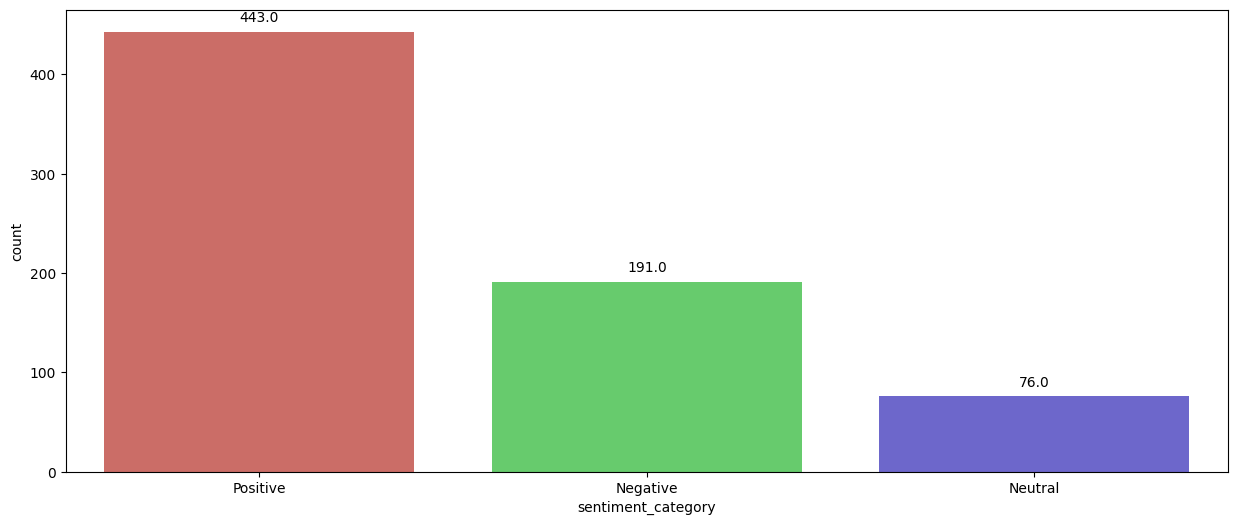

In [100]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='sentiment_category', data=df_new, palette='hls')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

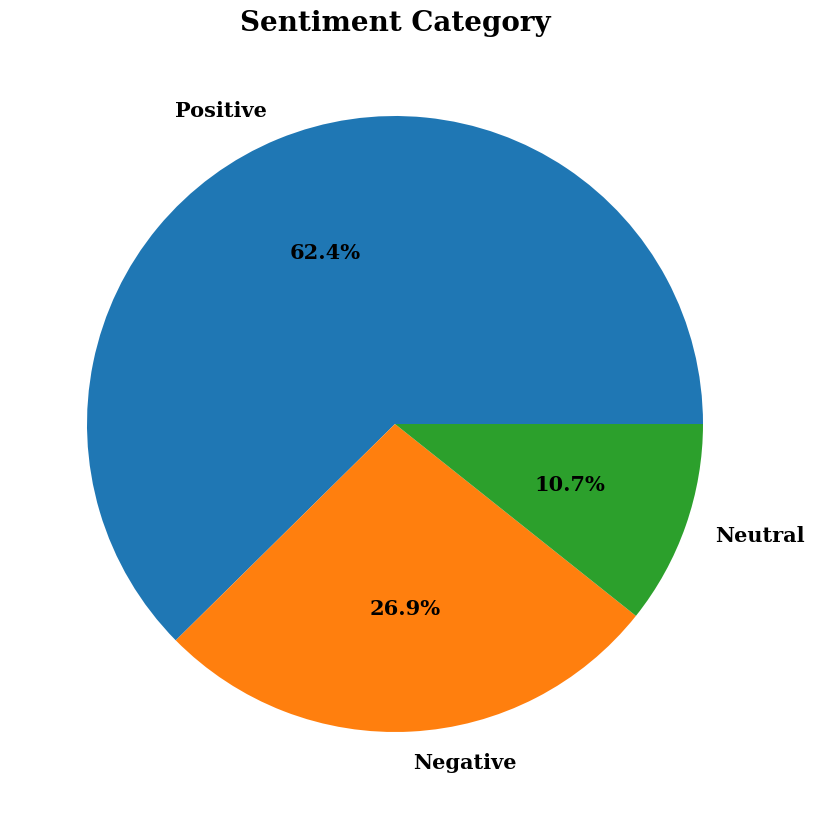

In [101]:
plt.figure(figsize=(20,10)) 
plt.pie(df_new['sentiment_category'].value_counts(), labels=df_new['sentiment_category'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment Category', size=20, **hfont) 
plt.show()

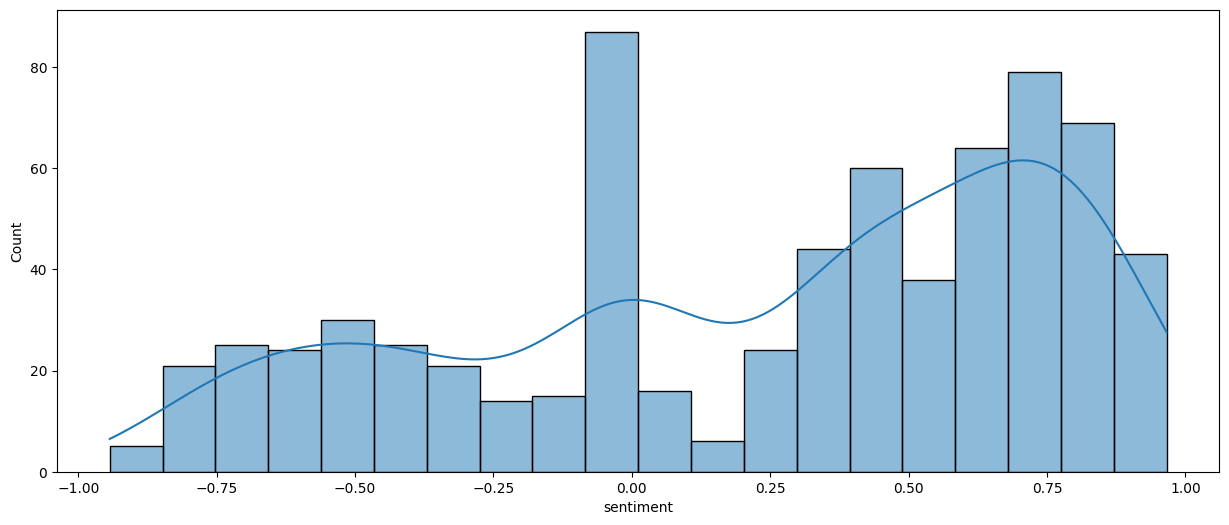

In [102]:
plt.figure(figsize=(15,6))
sns.histplot(df_new['sentiment'], bins = 20, kde = True, palette='hls')
plt.show()

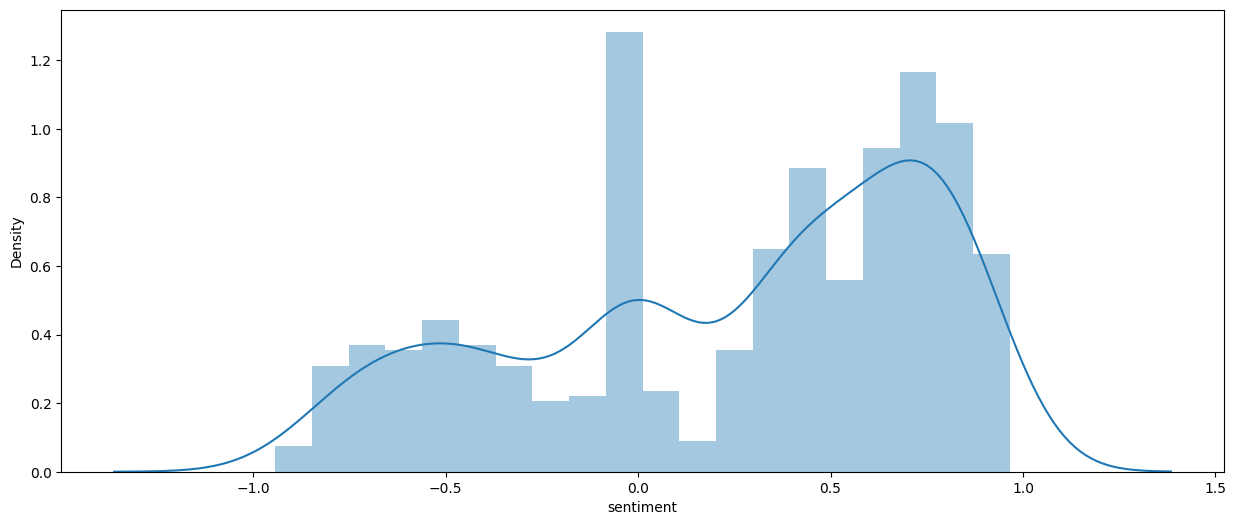

In [103]:
plt.figure(figsize=(15,6))
sns.distplot(df_new['sentiment'], bins = 20, kde = True)
plt.show()

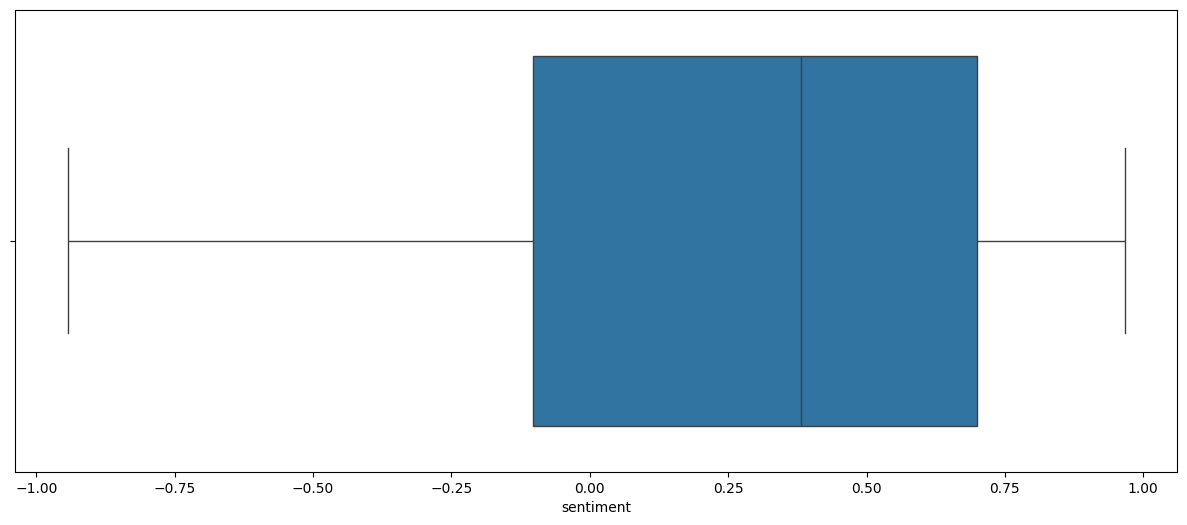

In [104]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df_new['sentiment'], data = df_new)
plt.show()

In [105]:
df = df_new[['Text', 'sentiment_category']]

In [106]:
df

Text sentiment_category
0                             enjoy beautiful day park           Positive
1                             traffic terrible morning           Negative
2                                finish amaze workout            Positive
3                      excite upcoming weekend getaway           Positive
4                        try new recipe dinner tonight            Neutral
..                                                 ...                ...
727  collaborate science project receive recognitio...           Positive
728  attend surprise birthday party organize friend...           Positive
729  successfully fundraise school charity initiati...           Positive
730  participate multicultural festival celebrate d...           Positive
731  organize virtual talent show challenge time br...           Positive

[710 rows x 2 columns]

In [107]:
label_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['sentiment_category'] = df['sentiment_category'].map(label_mapping)

In [108]:
df

Text  sentiment_category
0                             enjoy beautiful day park                   1
1                             traffic terrible morning                  -1
2                                finish amaze workout                    1
3                      excite upcoming weekend getaway                   1
4                        try new recipe dinner tonight                   0
..                                                 ...                 ...
727  collaborate science project receive recognitio...                   1
728  attend surprise birthday party organize friend...                   1
729  successfully fundraise school charity initiati...                   1
730  participate multicultural festival celebrate d...                   1
731  organize virtual talent show challenge time br...                   1

[710 rows x 2 columns]

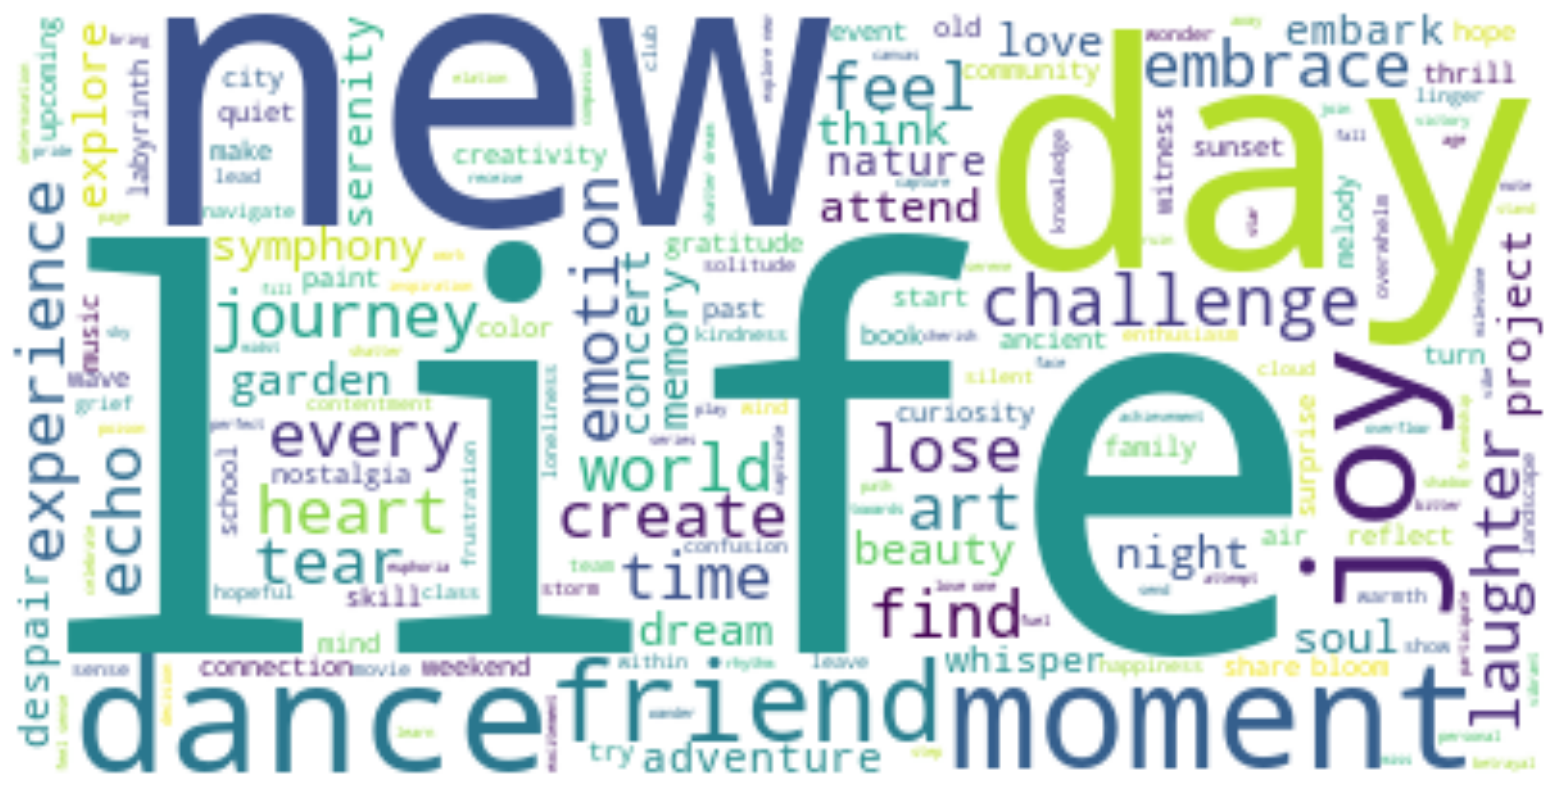

In [109]:
text_data = ' '.join(df['Text'])
wordcloud = WordCloud(background_color='white').generate(text_data)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.show()

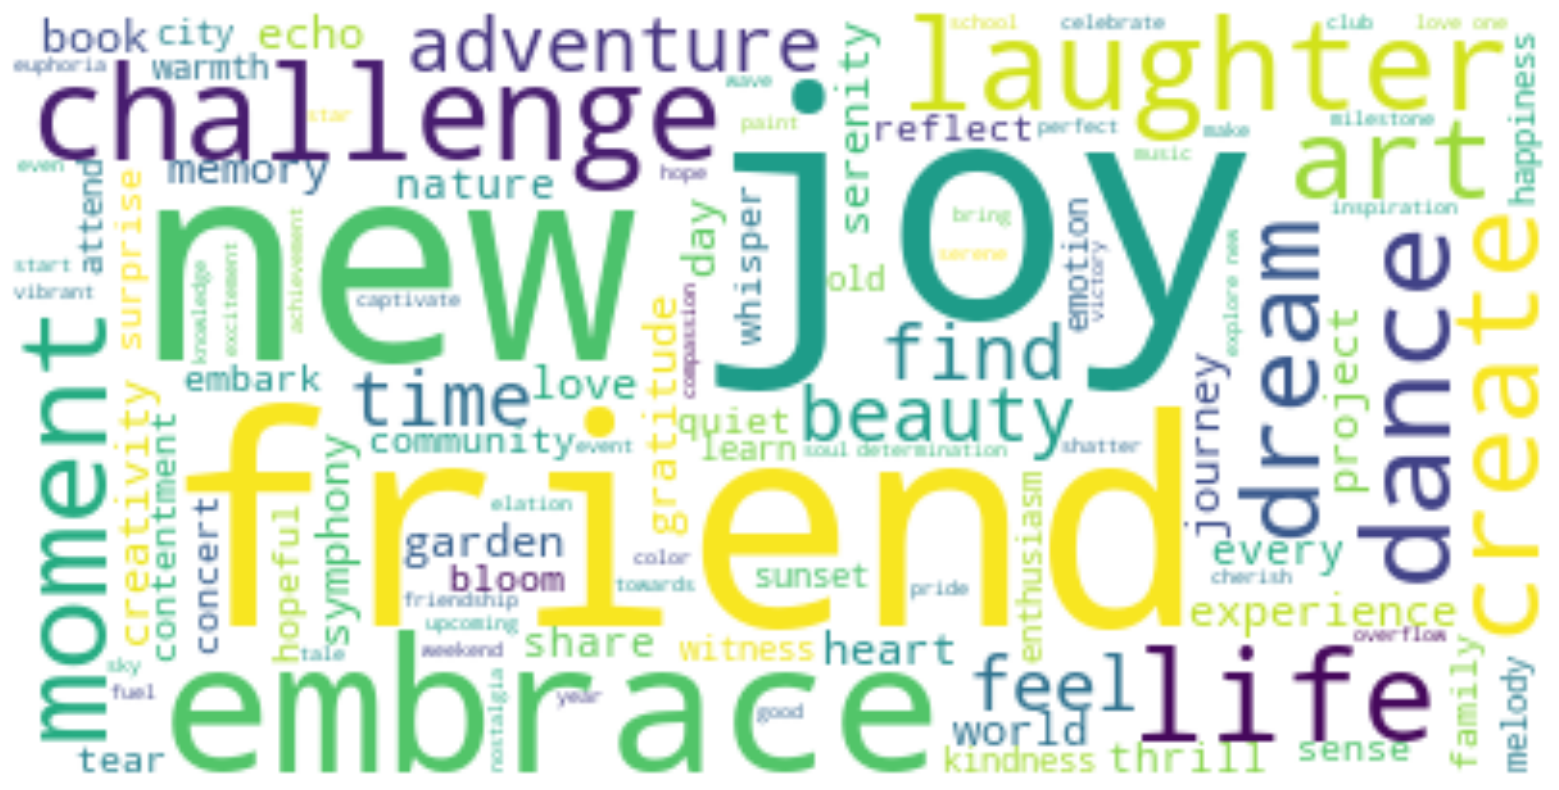

In [110]:
positive_text_data = ' '.join(df_new[df['sentiment_category'] == 1]['Text'])  

if positive_text_data:
    wordcloud = WordCloud(background_color='white').generate(positive_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No positive text data to generate a word cloud.')

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X = df['Text']
y = df['sentiment_category']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
from imblearn.over_sampling import RandomOverSampler

In [116]:
vectorizer = TfidfVectorizer(max_features=10000)  
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

In [117]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(train_features, y_train)

In [118]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lr_classifier = LogisticRegression()
lr_classifier.fit(train_features, y_train)

LogisticRegression()

In [121]:
y_pred = lr_classifier.predict(test_features)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.7183098591549296


In [122]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.6840560422904883
Recall: 0.7183098591549296
F1 Score: 0.6520703536382516


In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7183098591549296
Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.37      0.53        38
           0       0.00      0.00      0.00        15
           1       0.69      0.99      0.81        89

    accuracy                           0.72       142
   macro avg       0.54      0.45      0.45       142
weighted avg       0.68      0.72      0.65       142

Confusion Matrix:
 [[14  0 24]
 [ 0  0 15]
 [ 1  0 88]]


In [125]:
import scikitplot as skplt

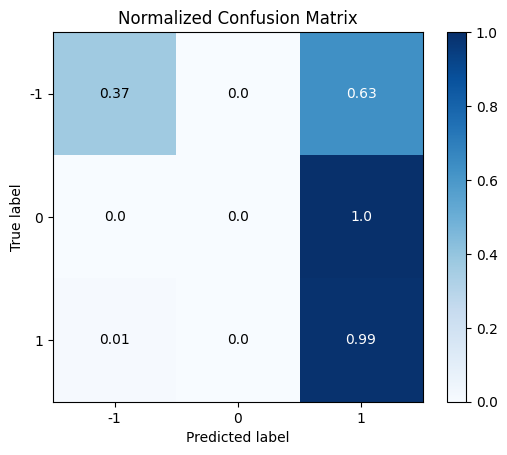

In [126]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(train_features, y_train)

DecisionTreeClassifier(random_state=42)

In [129]:
y_pred = dt_classifier.predict(test_features)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.7464788732394366


In [130]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.7496525643424111
Recall: 0.7464788732394366
F1 Score: 0.7462766986534591


In [131]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7464788732394366
Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.63      0.69        38
           0       0.41      0.47      0.44        15
           1       0.81      0.84      0.82        89

    accuracy                           0.75       142
   macro avg       0.66      0.65      0.65       142
weighted avg       0.75      0.75      0.75       142

Confusion Matrix:
 [[24  2 12]
 [ 2  7  6]
 [ 6  8 75]]


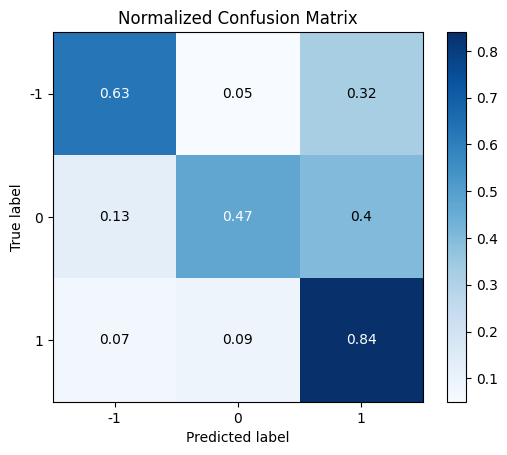

In [132]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [133]:
from sklearn.svm import SVC

In [134]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(train_features, y_train)

SVC(kernel='linear', random_state=42)

In [135]:
y_pred = svm_classifier.predict(test_features)
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.7887323943661971


In [136]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.7821854675453331
Recall: 0.7887323943661971
F1 Score: 0.7583707832257957


In [137]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7887323943661971
Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.66      0.74        38
           0       0.67      0.13      0.22        15
           1       0.78      0.96      0.86        89

    accuracy                           0.79       142
   macro avg       0.76      0.58      0.61       142
weighted avg       0.78      0.79      0.76       142

Confusion Matrix:
 [[25  1 12]
 [ 1  2 12]
 [ 4  0 85]]


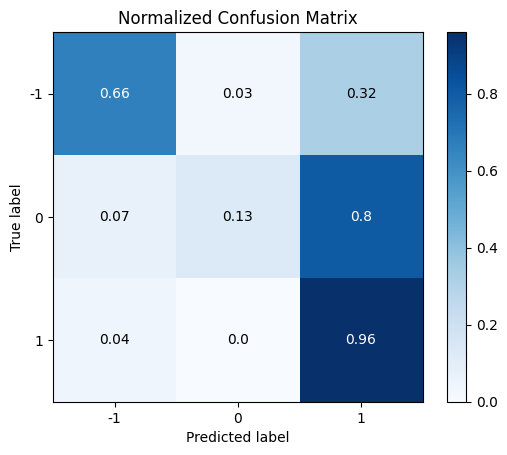

In [138]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [139]:
from sklearn.naive_bayes import MultinomialNB

In [140]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_features, y_train)

MultinomialNB()

In [141]:
y_pred = naive_bayes_classifier.predict(test_features)

In [142]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.6800222824550609
Recall: 0.7394366197183099
F1 Score: 0.682600688879037


In [143]:
nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7394366197183099
Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.47      0.61        38
           0       0.00      0.00      0.00        15
           1       0.72      0.98      0.83        89

    accuracy                           0.74       142
   macro avg       0.53      0.48      0.48       142
weighted avg       0.68      0.74      0.68       142

Confusion Matrix:
 [[18  0 20]
 [ 1  0 14]
 [ 2  0 87]]


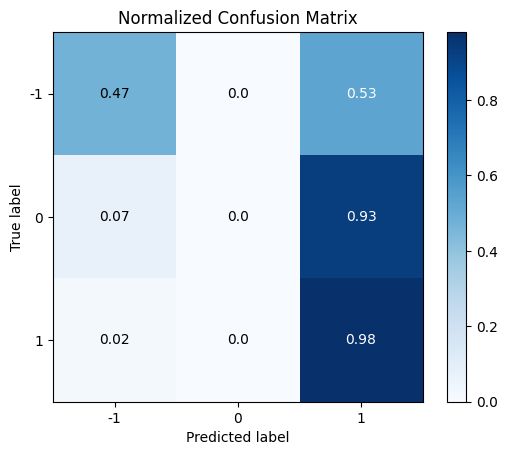

In [144]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(train_features, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [147]:
y_pred = rf_classifier.predict(test_features)

In [148]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.652727619276915
Recall: 0.676056338028169
F1 Score: 0.652491171926727


In [149]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.676056338028169
Classification Report:
               precision    recall  f1-score   support

          -1       0.69      0.47      0.56        38
           0       0.25      0.13      0.17        15
           1       0.70      0.85      0.77        89

    accuracy                           0.68       142
   macro avg       0.55      0.49      0.50       142
weighted avg       0.65      0.68      0.65       142

Confusion Matrix:
 [[18  1 19]
 [ 0  2 13]
 [ 8  5 76]]


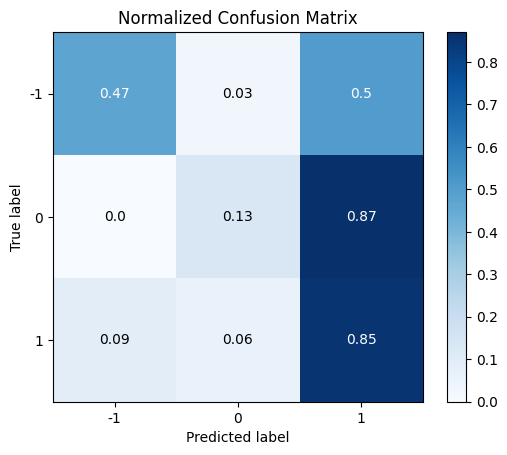

In [150]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [151]:
accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Multinomail Naive Bayes':nb_accuracy,
    'Random Forest': rf_accuracy,
}

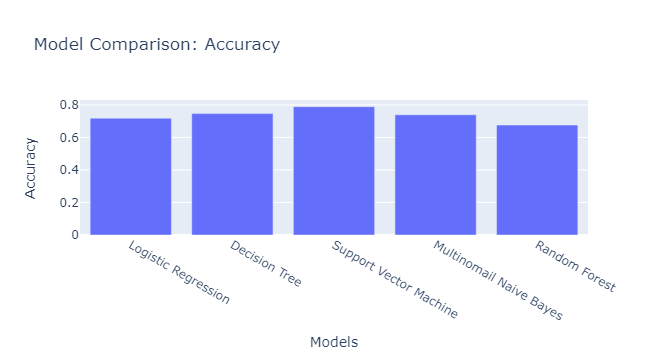

In [152]:
fig = go.Figure(
    data=[
        go.Bar(x=list(accuracies.keys()), y=list(accuracies.values()))
    ],
    layout={
        'title': 'Model Comparison: Accuracy',
        'xaxis': {'title': 'Models'},
        'yaxis': {'title': 'Accuracy'}
    }
)
fig.show()

In [153]:
from sklearn.preprocessing import LabelEncoder

In [154]:
le = LabelEncoder()
df['sentiment_category'] = le.fit_transform(df['sentiment_category'])

In [155]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [156]:
X = df['Text'].values
y = df['sentiment_category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(len(x) for x in X_train_seq)  
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [158]:
model_simple = Sequential()
model_simple.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model_simple.add(Flatten())
model_simple.add(Dense(10, activation='relu'))
model_simple.add(Dense(3, activation='softmax')) 

In [159]:
model_simple.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_simple = model_simple.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
9/9 [==============================] - 1s 41ms/step - loss: 1.0620 - accuracy: 0.5669 - val_loss: 0.9751 - val_accuracy: 0.6549
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 0.9526 - accuracy: 0.6197 - val_loss: 0.8814 - val_accuracy: 0.6549
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 0.8642 - accuracy: 0.6197 - val_loss: 0.8316 - val_accuracy: 0.6549
Epoch 4/10
9/9 [==============================] - 0s 11ms/step - loss: 0.7962 - accuracy: 0.6268 - val_loss: 0.8079 - val_accuracy: 0.6549
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 0.7207 - accuracy: 0.6602 - val_loss: 0.7823 - val_accuracy: 0.6549
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.6065 - accuracy: 0.8028 - val_loss: 0.7436 - val_accuracy: 0.7183
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 0.4691 - accuracy: 0.8820 - val_loss: 0.6915 - val_accuracy: 0.7535
Epoch 8/10
9/9 [===============

In [161]:
loss, accuracy = model_simple.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

5/5 [==============================] - 0s 83us/step - loss: 0.6119 - accuracy: 0.7958
Test Accuracy: 0.7958


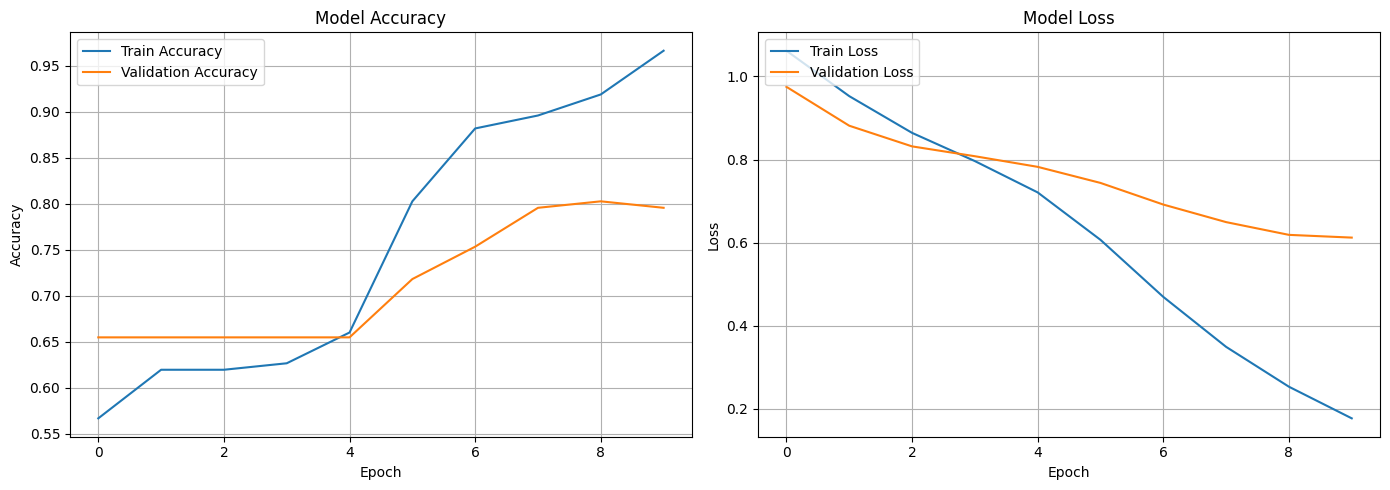

In [162]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['accuracy'], label='Train Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_simple.history['loss'], label='Train Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

5/5 [==============================] - 0s 2ms/step


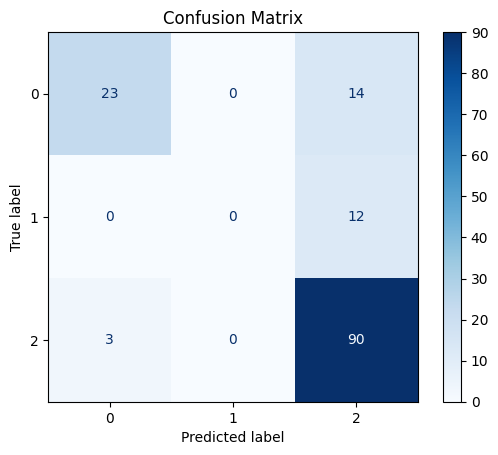

In [163]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model_simple.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [164]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.88      0.62      0.73        37
     Class 1       0.00      0.00      0.00        12
     Class 2       0.78      0.97      0.86        93

    accuracy                           0.80       142
   macro avg       0.55      0.53      0.53       142
weighted avg       0.74      0.80      0.75       142



In [165]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))  

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
9/9 [==============================] - 4s 113ms/step - loss: 1.0468 - accuracy: 0.5616 - val_loss: 0.8889 - val_accuracy: 0.6549
Epoch 2/10
9/9 [==============================] - 0s 38ms/step - loss: 0.9139 - accuracy: 0.6162 - val_loss: 0.8352 - val_accuracy: 0.6549
Epoch 3/10
9/9 [==============================] - 0s 41ms/step - loss: 0.8659 - accuracy: 0.6162 - val_loss: 0.8052 - val_accuracy: 0.6549
Epoch 4/10
9/9 [==============================] - 0s 40ms/step - loss: 0.8029 - accuracy: 0.6162 - val_loss: 0.7632 - val_accuracy: 0.6549
Epoch 5/10
9/9 [==============================] - 0s 40ms/step - loss: 0.6815 - accuracy: 0.6743 - val_loss: 0.6784 - val_accuracy: 0.6761
Epoch 6/10
9/9 [==============================] - 0s 43ms/step - loss: 0.4881 - accuracy: 0.8204 - val_loss: 0.5552 - val_accuracy: 0.8592
Epoch 7/10
9/9 [==============================] - 0s 41ms/step - loss: 0.3251 - accuracy: 0.8644 - val_loss: 0.4516 - val_accuracy: 0.8451
Epoch 8/10
9/9 [==========

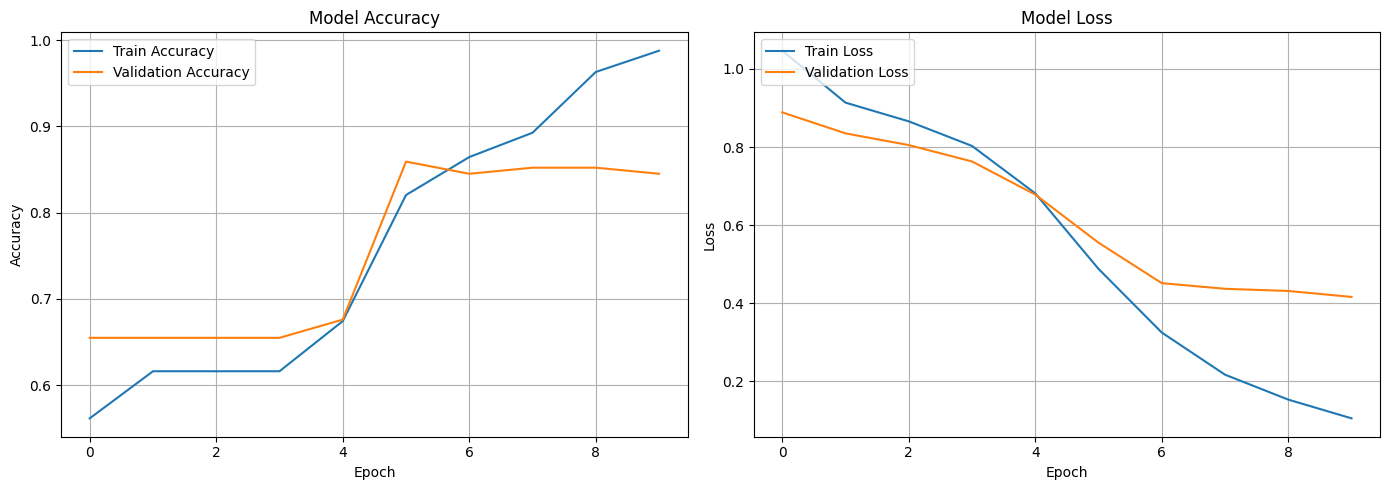

In [166]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

5/5 [==============================] - 0s 8ms/step


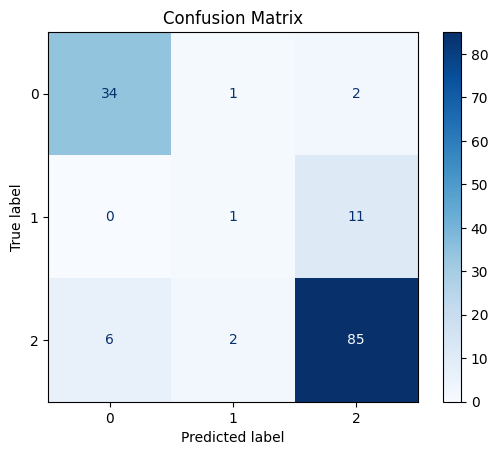

In [167]:
y_pred = model_lstm.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [168]:
report = classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.85      0.92      0.88        37
     Class 1       0.25      0.08      0.12        12
     Class 2       0.87      0.91      0.89        93

    accuracy                           0.85       142
   macro avg       0.66      0.64      0.63       142
weighted avg       0.81      0.85      0.82       142



In [169]:
from tensorflow.keras.layers import SimpleRNN

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model_rnn.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(3, activation='softmax'))  

model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
9/9 [==============================] - 2s 52ms/step - loss: 1.0185 - accuracy: 0.4930 - val_loss: 0.8667 - val_accuracy: 0.6549
Epoch 2/10
9/9 [==============================] - 0s 19ms/step - loss: 0.8979 - accuracy: 0.6127 - val_loss: 0.8439 - val_accuracy: 0.6549
Epoch 3/10
9/9 [==============================] - 0s 20ms/step - loss: 0.8605 - accuracy: 0.6250 - val_loss: 0.8230 - val_accuracy: 0.6549
Epoch 4/10
9/9 [==============================] - 0s 20ms/step - loss: 0.7934 - accuracy: 0.6532 - val_loss: 0.8123 - val_accuracy: 0.6549
Epoch 5/10
9/9 [==============================] - 0s 17ms/step - loss: 0.7169 - accuracy: 0.7254 - val_loss: 0.7968 - val_accuracy: 0.6549
Epoch 6/10
9/9 [==============================] - 0s 23ms/step - loss: 0.5602 - accuracy: 0.8239 - val_loss: 0.7641 - val_accuracy: 0.6549
Epoch 7/10
9/9 [==============================] - 0s 27ms/step - loss: 0.4320 - accuracy: 0.8979 - val_loss: 0.7146 - val_accuracy: 0.6901
Epoch 8/10
9/9 [===========

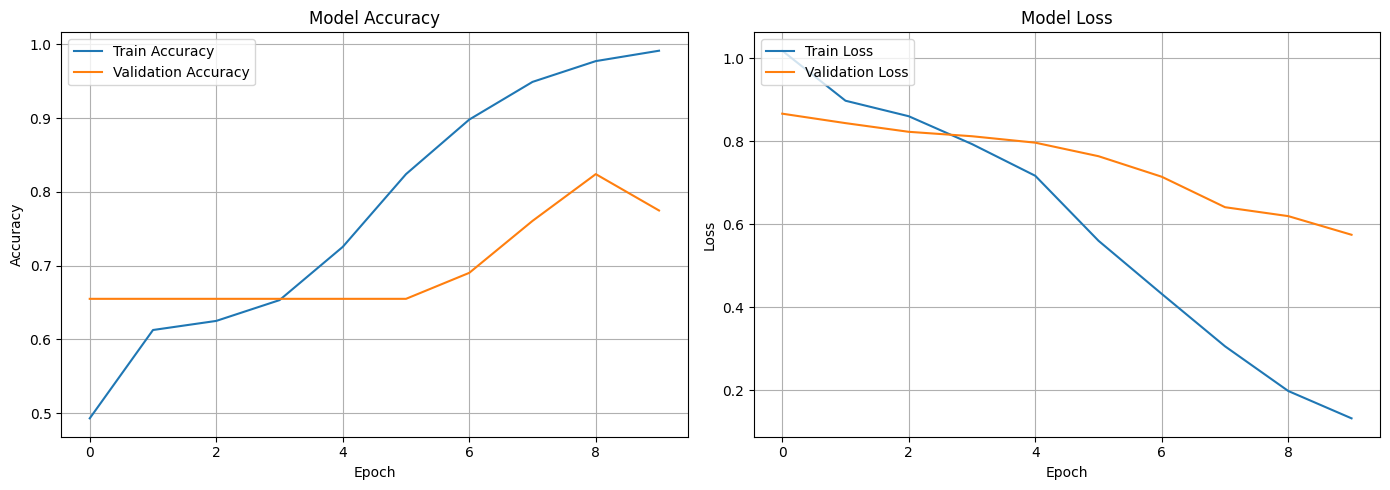

In [170]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

5/5 [==============================] - 0s 4ms/step


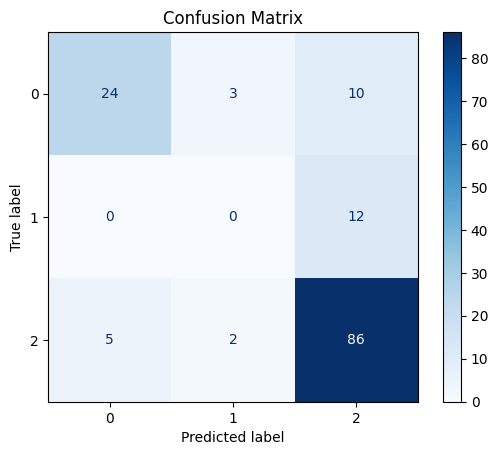

In [171]:
y_pred = model_rnn.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [172]:
report = classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.83      0.65      0.73        37
     Class 1       0.00      0.00      0.00        12
     Class 2       0.80      0.92      0.86        93

    accuracy                           0.77       142
   macro avg       0.54      0.52      0.53       142
weighted avg       0.74      0.77      0.75       142



In [173]:
from tensorflow.keras.layers import Bidirectional

model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model_bilstm.add(SpatialDropout1D(0.2))
model_bilstm.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model_bilstm.add(Dense(3, activation='softmax'))  

model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_bilstm = model_bilstm.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
9/9 [==============================] - 9s 159ms/step - loss: 1.0220 - accuracy: 0.5739 - val_loss: 0.8515 - val_accuracy: 0.6549
Epoch 2/10
9/9 [==============================] - 1s 53ms/step - loss: 0.9096 - accuracy: 0.6162 - val_loss: 0.8396 - val_accuracy: 0.6549
Epoch 3/10
9/9 [==============================] - 1s 58ms/step - loss: 0.8787 - accuracy: 0.6162 - val_loss: 0.8208 - val_accuracy: 0.6549
Epoch 4/10
9/9 [==============================] - 0s 54ms/step - loss: 0.8158 - accuracy: 0.6162 - val_loss: 0.7737 - val_accuracy: 0.6549
Epoch 5/10
9/9 [==============================] - 1s 57ms/step - loss: 0.6917 - accuracy: 0.6743 - val_loss: 0.6505 - val_accuracy: 0.7606
Epoch 6/10
9/9 [==============================] - 0s 52ms/step - loss: 0.4583 - accuracy: 0.8468 - val_loss: 0.4833 - val_accuracy: 0.8451
Epoch 7/10
9/9 [==============================] - 0s 54ms/step - loss: 0.2754 - accuracy: 0.8715 - val_loss: 0.5161 - val_accuracy: 0.8592
Epoch 8/10
9/9 [==========

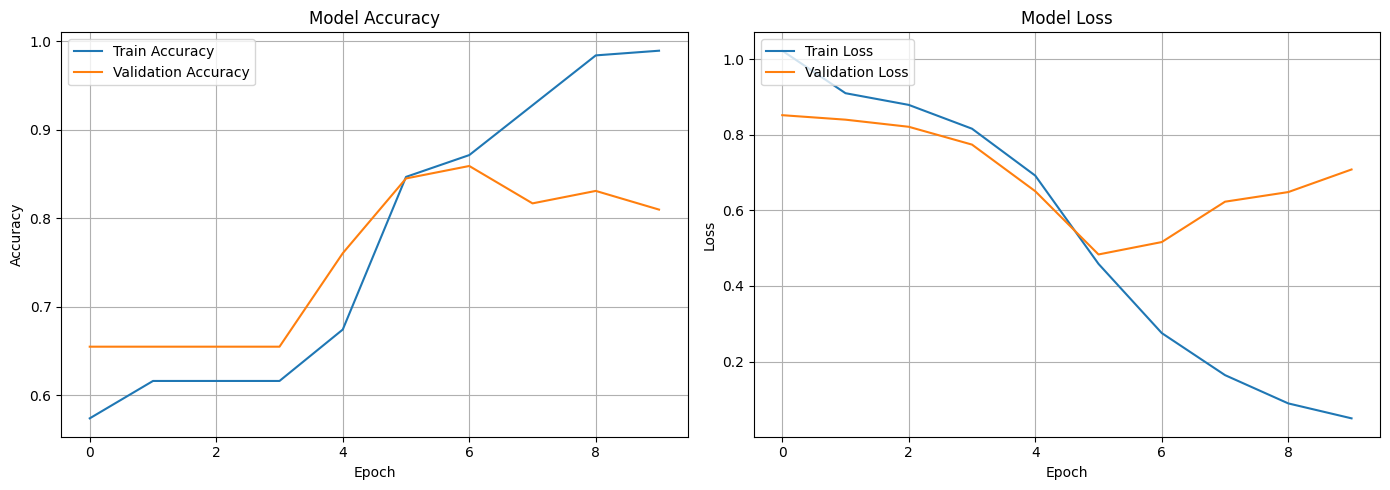

In [174]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['loss'], label='Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

5/5 [==============================] - 1s 8ms/step


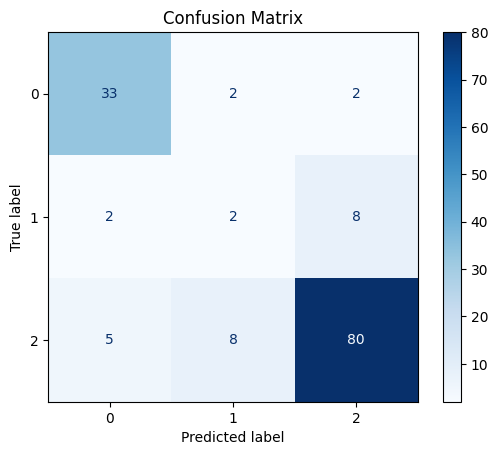

In [175]:
y_pred = model_bilstm.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [176]:
report = classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.82      0.89      0.86        37
     Class 1       0.17      0.17      0.17        12
     Class 2       0.89      0.86      0.87        93

    accuracy                           0.81       142
   macro avg       0.63      0.64      0.63       142
weighted avg       0.81      0.81      0.81       142

